# Contexte du projet

## Problématique : Comment améliorer la santé des français ?


## But de l’étude :
- Est-ce que le nutriscore y contribue ?
- Si non, comment pouvons -  nous améliorer la santé de la population ?

## Methode :
- Découvrir les caractéristiques du nutriscore et son intérêt
- Etudier les autres moyens à notre disposition pour améliorer l’efficacité du nutriscore ou apporter de nouvelles solutions

# Construction de la base de données

## Nos données

In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats
import seaborn as sns
from Package import Scripts_Analyse01 as pk

In [219]:
data = pd.read_csv("./Data/fr.openfoodfacts.org.products.csv", sep="\t",low_memory=False)

In [220]:
data.shape

(320772, 162)

In [222]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

Nous disposons de 320 772 produits alimentaires et de 162 colonnes.

In [223]:
for i in data.columns:
    print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

## Nos variables

Nous allons commencer par sélectionner les colonnes qu'il nous faut pour améliorer la santé des français.

Certains organismes officiels, comme l’AFSSA (Agence française de sécurité sanitaire des aliments), ont crée des recommandations sous forme d’apports nutritionnels conseillés (ANC) pour chaque type de nutriment.

source : https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte/en-pratique.html

Selon le tableau nutritionnel, voici les informations dont nous avons besoin : Glucides, Lipides, Protéines, Fibres.
Et les aliments qui contiennent de l'huile de palme sont à notifier.

Comment le Nutri-Score Fr est-il calculé?
Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).

Sélectionnons donc seulement les colonnes nécessaires à notre étude. Nous sélectionnons tous les aliments même ceux qui ne sont pas vendu en France. En effet, ils peuvent être vendus prochainement et être interessant pour notre étude.


In [5]:
data = data[["code", "product_name", "generic_name", "categories", 
            "ingredients_text","energy_100g", "carbohydrates_100g", "proteins_100g", "fat_100g",
            "saturated-fat_100g", "fiber_100g", "fruits-vegetables-nuts_100g", "sugars_100g", "salt_100g",
             "additives_n", 
            "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", 
            "ingredients_from_palm_oil", "ingredients_that_may_be_from_palm_oil",
            "nutrition_grade_fr", "main_category", "nutrition-score-fr_100g"]]

In [6]:
data = data.rename(columns={'saturated-fat_100g': 'saturated_fat_100g', 
                        'fruits-vegetables-nuts_100g': 'fruits_vegetables_nuts_100g',
                       'nutrition-score-fr_100g': 'nutrition_score_fr_100g'})

In [7]:
data.shape

(320772, 22)

Nous avons conservé 22 colonnes.

Regardons un extrait de nos données.

In [8]:
data.head(5)

,code,product_name,generic_name,categories,ingredients_text,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,...,sugars_100g,salt_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,main_category,nutrition_score_fr_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",2243.0,64.29,3.57,28.57,28.57,...,14.29,0.00000,0.0,0.0,0.0,NaN,NaN,d,NaN,14.0
2,0000000004559,Peanuts,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",1941.0,60.71,17.86,17.86,0.00,...,17.86,0.63500,0.0,0.0,0.0,NaN,NaN,b,NaN,0.0
3,0000000016087,Organic Salted Nut Mix,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",2540.0,17.86,17.86,57.14,5.36,...,3.57,1.22428,0.0,0.0,0.0,NaN,NaN,d,NaN,12.0
4,0000000016094,Organic Polenta,NaN,NaN,Organic polenta,1552.0,77.14,8.57,1.43,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Nettoyage des données

### Formatage des données

Mettons toutes nos données en majuscule.

In [9]:
data = pk.data_majuscule(data)

Vérifions s'ils existent des doublons (toutes les colonnes identiques)

In [10]:
data.duplicated().sum()

0

On considère comme produit identique les lignes qui ont le même nom de produit et le même code barre.
En effet, il est noté que des articles différents peuvent avoir le même code barre.

In [11]:
data[['code', 'product_name']].duplicated().sum()

19

Regardons ces doublons

In [12]:
data_doublons = data.loc[data[['code', 'product_name']].duplicated(keep=False),:]

In [218]:
data_doublons

,code,product_name,generic_name,categories,ingredients_text,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,...,sugars_100g,salt_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,main_category,nutrition_score_fr_100g
189103,NaN,FRANCE,"_LAIT_ ENTIER (59,5 %), _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, SUCRE (5,4 %), FRUITS (5 %) : FRAISE, FRAMBOISE, FRUITS ROUGES (MÛRE, FRAISE, FRAMBOISE), SIROP DE FRUCTOSE-GLUCOSE (3.5 % EN MOYENNE), _CRÈME_, ÉPAISSISSANTS : AMIDON TRANSFORMÉ, PECTINE, FARINE DE GRAINE DE CAROUBE, GOMME GUAR, ARÔMES, CITRATE DE CALCIUM, COLORANTS : CARMIN, ANTHOCYANE, FERMENTS LACTIQUES, JUS CONCENTRÉ DE BETTERAVE, VITAMINE D.",125 G (1 POT),YAOURTS ENTIERS,NaN,NaN,0.137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,FRANCE,"_LAIT_ ENTIER (78%), FRUITS : MANGUE, ABRICOT, CERISE (6%), FRAISE (5,8%), LAIT ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, SUCRE (4,3%), FRUCTOSE (2,8% EN MOYENNE), CRÈME (LAIT), PURÉE CONCENTRÉE DE FRAISE (DANS VARIÉTÉ FRAISE), SIROP DE FRUCTOSE (0,5%), ÉPAISSISSANTS : E 1422, E 440, E 410, E 412, FERMENTS LACTIÂUES DONT BIFIDOBACTERIUM (BIFIDUS ACTIREGULARIS®) (LAIT), ARÔMES (LAIT), COLORANTS : E 160C, E 120, E 163, CORRECTEURS ACIDITÉ : E 330, E 331.",125 G,YAOURTS BRASSÉS,NaN,NaN,0.122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,FRANCE,"_LAIT_ ÉCRÉMÉ, _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, FRUITS : ABRICOT (13%), FRAISE (10,8%), PÊCHE (10%), CERISE (8,7%) ANANAS (8,5%), CITRON (2%), CELLULES DE CITRON (DANS LA VARIÉTÉ CITRON), AGENT DE CHARGE : POLYDEXTROSE (FIBRES) (DANS LES VARIÉTÉS FRAISE, CITRON, ANANAS), ÉPAISSISSANTS : AMIDON TRANSFORMÉ, GOMME GUAR, PECTINE, CARRAGHÉNANES, GOMME XANTHANE, PROTÉINES DE LAIT, CORRECTEURS D'ACIDITÉ : CITRATE DE SODIUM, ACIDE CITRIQUE, CITRATE DE CALCIUM, JUS DE CITRON VERT ET DE CITRON CONCENTRÉS (DANS LES VARIÉTÉS CITRON, ANANAS, FRAISE ET ABRICOT), CONCENTRÉ DE CAROTTE ET DE CITROUILLE (DANS LA VARIÉTÉ ABRICOT), COLORANT: ANTHONCYANES (DANS LA VARIÉTÉ CERISE), JUS DE CAROTTE, POURPRE CONCENTRÉ (DANS LA VARIÉTÉ FRAISE), ARÔMES (LAIT), ÉDULCORANTS: ACÉSULFAME K, SUCRALOSE, FERMENTS LACTIQUES (LAIT), EXTRAIT DE CAROTTE (DANS LA VARIÉTÉ FRAISE), VITAMINE D",16 POTS DE 125 G,YAOURTS,NaN,NaN,0.158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,FRANCE,"_LAIT_ ÉCRÉMÉ, FRUITS : FRAISE (12 %), CERISE (10 %), FRAMBOISE (10 %), MYRTILLE (7 %), _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE AGENT DE CHARGE : POLYDEXTROSE (FIBRES) (DANS LES VARIÉTÉS FRAISE ET FRAMBOISE) ÉPAISSISSANTS : AMIDON TRANSFORMÉ, PECTINE, GOMME GUAR, CARRAGHÉNANES, GOMME XANTHANE, PROTÉINES DE LAIT, JUS DE CAROTTE POURPRE ET DE CAROTTE CONCENTRÉS (DANS LES VARIÉTÉS FRAISE ET FRAMBOISE), JUS DE CITRON CONCENTRÉ (DANS LA VARIÉTÉ FRAISE), ARÔMES, ÉDULCORANTS : ACÉSULFAME K, SUCRALOSE, FERMENTS LACTIQUES, CONCENTRÉ DE CAROTTE (DANS LA VARIÉTÉ FRAISE), VITAMINE D.",125 G (1 POT),YAOURTS AUX FRUITS,NaN,NaN,0.156,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,FRANCE,"_LAIT_ ÉCRÉMÉ, _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, FRUITS: ABRICOT (13 %), FRAISE (10,8 %), PÊCHE (10 %), CERISE (8,7 %), ANANAS (8,5 %), CITRON (2 %), CELLULES DE CITRON (DANS LA VARIÉTÉ CITRON), AGENT DE CHARGE: POLYDEXTROSE (FIBRES) (DANS LES VARIÉTÉS FRAISE), ÉPAISSISSANTS : AMIDON TRANSFORMÉ, GOMME GUAR, PECTINE, CARRAGHÉNANES, GOMME XANTHANE, PROTÉINES DE _LAIT_, CORRECTEURS D'ACIDITÉ : CITRATE DE SODIUM, ACIDE CITRIQUE, CITRATE DE CALCIUM, JUS DE CITRON VERT ET DE CITRON CONCENTRÉS (DANS LES VARIÉTÉS CITRON, ANANAS, FRAISE ET ABRICOT), CONCENTRÉ DE CAROTTE ET DE CITROUILLE (DANS LA VARIÉTÉ ABRICOT), COLORANT : ANTHONCYANES (DANS LA VARIÉTÉ CERISE), JUS DE CAROTTE POURPRE CONCENTRÉ (DANS LA VARIÉTÉ FRAISE), ARÔMES (_LAIT_), ÉDULCORANTS : ACESULFAME K, SUCRALOSE, FERMENTS LACTIQUES (_LAIT_, EXTRAIT DE CAROTTE (DANS LA VARIÉTÉ FRAISE), VITAMINE 

In [13]:
pd.set_option('display.max_colwidth', None) 
data_doublons[["ingredients_text", 'product_name', 'generic_name']]

,ingredients_text,product_name,generic_name
189103,YAOURTS ENTIERS,FRANCE,"_LAIT_ ENTIER (59,5 %), _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, SUCRE (5,4 %), FRUITS (5 %) : FRAISE, FRAMBOISE, FRUITS ROUGES (MÛRE, FRAISE, FRAMBOISE), SIROP DE FRUCTOSE-GLUCOSE (3.5 % EN MOYENNE), _CRÈME_, ÉPAISSISSANTS : AMIDON TRANSFORMÉ, PECTINE, FARINE DE GRAINE DE CAROUBE, GOMME GUAR, ARÔMES, CITRATE DE CALCIUM, COLORANTS : CARMIN, ANTHOCYANE, FERMENTS LACTIQUES, JUS CONCENTRÉ DE BETTERAVE, VITAMINE D."
189119,YAOURTS BRASSÉS,FRANCE,"_LAIT_ ENTIER (78%), FRUITS : MANGUE, ABRICOT, CERISE (6%), FRAISE (5,8%), LAIT ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, SUCRE (4,3%), FRUCTOSE (2,8% EN MOYENNE), CRÈME (LAIT), PURÉE CONCENTRÉE DE FRAISE (DANS VARIÉTÉ FRAISE), SIROP DE FRUCTOSE (0,5%), ÉPAISSISSANTS : E 1422, E 440, E 410, E 412, FERMENTS LACTIÂUES DONT BIFIDOBACTERIUM (BIFIDUS ACTIREGULARIS®) (LAIT), ARÔMES (LAIT), COLORANTS : E 160C, E 120, E 163, CORRECTEURS ACIDITÉ : E 330, E 331."
189152,YAOURTS,FRANCE,"_LAIT_ ÉCRÉMÉ, _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, FRUITS : ABRICOT (13%), FRAISE (10,8%), PÊCHE (10%), CERISE (8,7%) ANANAS (8,5%), CITRON (2%), CELLULES DE CITRON (DANS LA VARIÉTÉ CITRON), AGENT DE CHARGE : POLYDEXTROSE (FIBRES) (DANS LES VARIÉTÉS FRAISE, CITRON, ANANAS), ÉPAISSISSANTS : AMIDON TRANSFORMÉ, GOMME GUAR, PECTINE, CARRAGHÉNANES, GOMME XANTHANE, PROTÉINES DE LAIT, CORRECTEURS D'ACIDITÉ : CITRATE DE SODIUM, ACIDE CITRIQUE, CITRATE DE CALCIUM, JUS DE CITRON VERT ET DE CITRON CONCENTRÉS (DANS LES VARIÉTÉS CITRON, ANANAS, FRAISE ET ABRICOT), CONCENTRÉ DE CAROTTE ET DE CITROUILLE (DANS LA VARIÉTÉ ABRICOT), COLORANT: ANTHONCYANES (DANS LA VARIÉTÉ CERISE), JUS DE CAROTTE, POURPRE CONCENTRÉ (DANS LA VARIÉTÉ FRAISE), ARÔMES (LAIT), ÉDULCORANTS: ACÉSULFAME K, SUCRALOSE, FERMENTS LACTIQUES (LAIT), EXTRAIT DE CAROTTE (DANS LA VARIÉTÉ FRAISE), VITAMINE D"
189160,YAOURTS AUX FRUITS,FRANCE,"_LAIT_ ÉCRÉMÉ, FRUITS : FRAISE (12 %), CERISE (10 %), FRAMBOISE (10 %), MYRTILLE (7 %), _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE AGENT DE CHARGE : POLYDEXTROSE (FIBRES) (DANS LES VARIÉTÉS FRAISE ET FRAMBOISE) ÉPAISSISSANTS : AMIDON TRANSFORMÉ, PECTINE, GOMME GUAR, CARRAGHÉNANES, GOMME XANTHANE, PROTÉINES DE LAIT, JUS DE CAROTTE POURPRE ET DE CAROTTE CONCENTRÉS (DANS LES VARIÉTÉS FRAISE ET FRAMBOISE), JUS DE CITRON CONCENTRÉ (DANS LA VARIÉTÉ FRAISE), ARÔMES, ÉDULCORANTS : ACÉSULFAME K, SUCRALOSE, FERMENTS LACTIQUES, CONCENTRÉ DE CAROTTE (DANS LA VARIÉTÉ FRAISE), VITAMINE D."
189162,YAOURTS AUX FRUITS,FRANCE,"_LAIT_ ÉCRÉMÉ, _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, FRUITS: ABRICOT (13 %), FRAISE (10,8 %), PÊCHE (10 %), CERISE (8,7 %), ANANAS (8,5 %), CITRON (2 %), CELLULES DE CITRON (DANS LA VARIÉTÉ CITRON), AGENT DE CHARGE: POLYDEXTROSE (FIBRES) (DANS LES VARIÉTÉS FRAISE), ÉPAISSISSANTS : AMIDON TRANSFORMÉ, GOMME GUAR, PECTINE, CARRAGHÉNANES, GOMME XANTHANE, PROTÉINES DE _LAIT_, CORRECTEURS D'ACIDITÉ : CITRATE DE SODIUM, ACIDE CITRIQUE, CITRATE DE CALCIUM, JUS DE CITRON VERT ET DE CITRON CONCENTRÉS (DANS LES VARIÉTÉS CITRON, ANANAS, FRAISE ET ABRICOT), CONCENTRÉ DE CAROTTE ET DE CITROUILLE (DANS LA VARIÉTÉ ABRICOT), COLORANT : ANTHONCYANES (DANS LA VARIÉTÉ CERISE), JUS DE CAROTTE POURPRE CONCENTRÉ (DANS LA VARIÉTÉ FRAISE), ARÔMES (_LAIT_), ÉDULCORANTS : ACESULFAME K, SUCRALOSE, FERMENTS LACTIQUES (_LAIT_, EXTRAIT DE CAROTTE (DANS LA VARIÉTÉ FRAISE), VITAMINE D."
189168,YAOURTS BRASSÉS,FRANCE,"_LAIT_ ENTIER (59,5 %), _LAIT_ ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, SUCRE (8,2 % EN MOYENNE), FRUITS : FRUITS ROUGES (MÛRE, FRAISE, FRAMBOISE) (5 %), FRAMBOISE (5 %), FRAISE (5 %), _CRÈME_, ÉPAISSISSANT : AMIDON TRANSFORMÉ, COLORANTS : CAROTÉNOÏDES, ANTHOCYANES, ARÔMES, FERMENTS _LACTIQUES_, VITAMINE D."
189242,YAOURTS ENTIERS,FRANCE,"_LAIT_ ENTIER, RHUBARBE (8 %), SUCRE (8 %), LAIT ÉCRÉMÉ CONCENTRÉ OU EN POUDRE, CRÈME (_LAIT_), ÉPAISSISSANTS : E1442, E410, CORRECTEURS D'ACIDITÉ : E331, E330, ARÔME, FERMENTS LACTIQUES DONT BIFIDOBACTÉRIUM (BIFIDUS ACTIREGULARIS®)(_LAIT_), SIROP DE SUCRE CUIT."
18

Les noms génériques semblent correspondre aux ingredients et le nom  des produits semblent correspondre au pays de provenance.
Nous décidons de supprimer ces lignes afin de ne pas fausser nos résultats.
Il semble que la saisie de ces produits ait été mal réalisée.

Faisons une jointure entre notre dataframe de base et notre dataframe qui contient les lignes mal renseignées.

In [14]:
data_result = pd.merge(data, data_doublons, on=["code", "product_name", "generic_name"], how="outer", indicator=True,  suffixes=('', '_del') )

Maintenant que nous avons identifié ces lignes dans le dataframe de base, on peut les supprimer.

In [15]:
data_result = data_result.loc[data_result["_merge"] == "left_only"].drop("_merge", axis=1)

Conservons les colonnes de notre dataframe de base.

In [16]:
data_result = data_result[[c for c in data_result.columns if not c.endswith('_del')]]

In [17]:
data=data_result

In [18]:
data[['code', 'product_name']].duplicated().sum()

0

In [19]:
data.shape

(320752, 22)

### Traitement des données manquantes

In [20]:
pk.del_Nan(data, 0.8,0, 0)

                                    index      freq
2                            generic_name  0.835462
11            fruits_vegetables_nuts_100g  0.990535
17              ingredients_from_palm_oil  1.000000
18  ingredients_that_may_be_from_palm_oil  1.000000


On supprime les colonnes avec 100 % de données manquantes

In [21]:
pk.del_Nan(data, 1,1, 0)

                                    index  freq
17              ingredients_from_palm_oil   1.0
18  ingredients_that_may_be_from_palm_oil   1.0
Columns deleted :  ['ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil']


On a beaucoup de données manquantes pour ces colonnes :
- fruits-vegetables-nuts_100g 
- generic_name

Il convient d'analyser plus préciser ces colonnes.

Regardons plus en détail la colonne generic_name qui est normalement une colonne obligatoire.

In [22]:
data[["product_name", "generic_name"]].loc[ pd.isna(data["generic_name"]) !=True]

,product_name,generic_name
174,SALADE CESAR,LAITUE EN SALADE
175,DANOISES À LA CANNELLE ROULÉES,PÂTISSERIE
177,FLUTE,FLUTE
180,CHAUSSONS TRESSÉS AUX POMMES,PÂTISSERIE
181,PAIN BURGER ARTISAN,PAIN
...,...,...
320758,MIEL DE CAMARGUE,MIEL
320761,ROUSSETTE DU BUGEY (2011),VINS BLANC DU BUGEY
320762,SZPROT W OLEJU ROSLINNYM,SPROT
320763,THÉ VERT EARL GREY,THÉ BIO ÉQUITABLE


Nom générique nous donne une information supplémentaire sur le produit. Nous pouvons concatener les colonnes product_name et generic_name.

In [23]:
data.loc[pd.isna(data['generic_name'])!=True, 'product_name_long'] = data["product_name"]+" - "+data['generic_name']
data.loc[pd.isna(data['generic_name'])==True, 'product_name_long'] =  data["product_name"]

Nous pouvons maintenant supprimer la colonne generic_name et product_name

In [24]:
del data["generic_name"]

In [25]:
data.shape

(320752, 20)

Regardons la colonne fruits-vegetables-nuts_100g.

In [26]:
data[["product_name_long", "fruits_vegetables_nuts_100g"]].loc[ pd.isna(data["fruits_vegetables_nuts_100g"]) !=True]

,product_name_long,fruits_vegetables_nuts_100g
283,CAKES AUX FRUITS - PÂTISSERIES AUX FRUITS CONFITS ET AUX RAISINS SECS AU RHUM,37.4
509,MAPLE SYRUP & PECAN COOKIE,0.0
564,PUR SOUP' VELOUTÉ DE LÉGUMES - SOUPE DE LÉGUMES,38.0
11332,PISTACHES GRILLÉES SANS SEL WONDERFUL - PISTACHES GRILLÉES SANS SEL,100.0
12967,CHEF'S STYLE CARROTS,0.0
...,...,...
318397,ORANGE ORIGINAL - JUS D'ORANGE,100.0
318432,CREME LIQUIDE,0.0
318537,"HÖLLINGER CRANBERRY SPRIZZ, 0,5 LTR FLASCHE",0.0
320445,PASSION FRUIT LIVE GOURMET YOGHURT - YOGHURT WITH FRUIT - SWEETENED,3.2


Il y a surement peu de produits qui contiennent des fruits, des végétaux et des arachides.
Nous décidons de laisser cette variable telle quelle.

Traçons la matrice des données manquantes afin de visualiser ces données pour les autres variables.

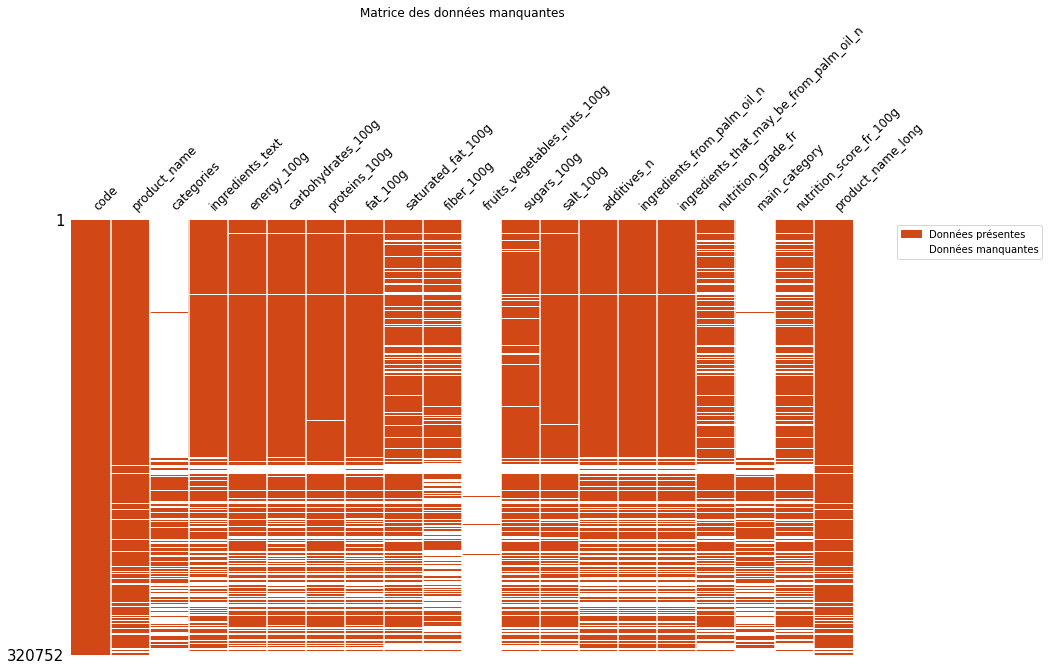

In [27]:
pk.matrix_vm(data, (14,8), (0.82, 0.28, 0.09))

Nous décidons de créer une modalité "AUTRES" pour les variables categories et main_categories.

In [28]:
data['categories'].fillna("AUTRES", inplace=True)

In [29]:
data['main_category'].fillna("AUTRES", inplace=True)

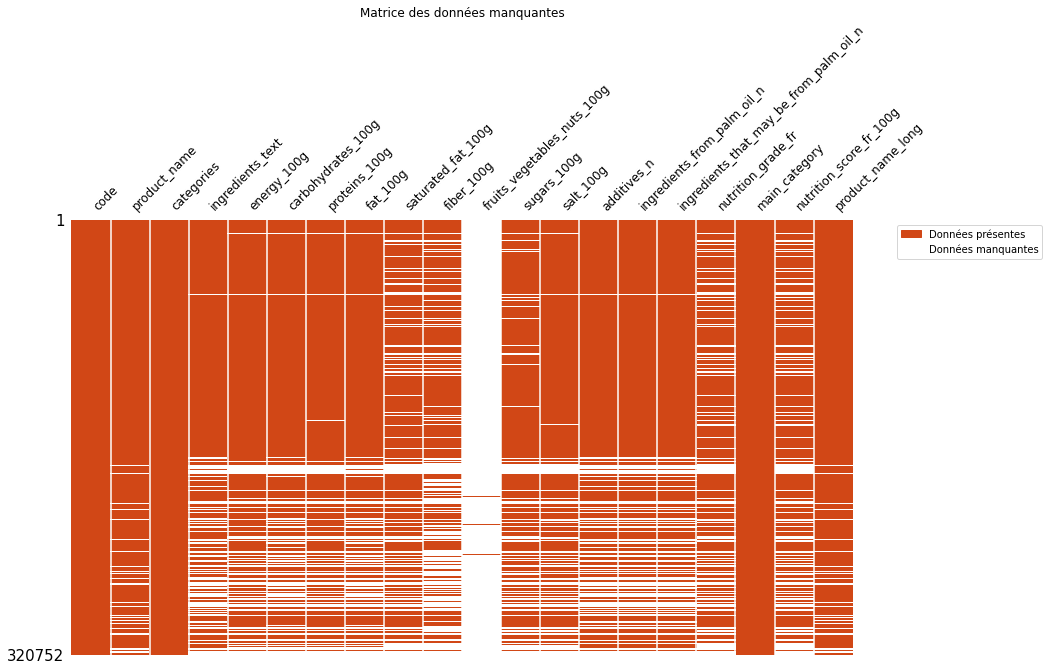

In [30]:
pk.matrix_vm(data, (14,8), (0.82, 0.28, 0.09))

Nous avons certains produits sans nom, sans ingrédient et sans grade nutriscore.
Il y a peu de données manquantes. Remplaçons ces données vides par NON RENSEIGNE.

In [31]:
data['product_name_long'].fillna("NON RENSEIGNE", inplace=True)
data['ingredients_text'].fillna("NON RENSEIGNE", inplace=True)
data['nutrition_grade_fr'].fillna("N.A", inplace=True)

Création d'une colonne présence possible d'huile de palme : 
Nous vérifions s'il y a de l'huile de palme possible et s'il y en a dans les ingredients.

In [32]:
data.loc[data.ingredients_text.str.contains('PALM')==True  , "ingredients_from_palm_oil"]="OUI"
data.loc[data.ingredients_from_palm_oil_n>=1, "ingredients_from_palm_oil" ]="OUI"
data.loc[data.ingredients_that_may_be_from_palm_oil_n>=2, "ingredients_from_palm_oil" ]="OUI"
data['ingredients_from_palm_oil'].fillna("NON", inplace=True)

Nous pouvons supprimer les deux autres variables concernant l'huile de palme, elles ne seront pas nécessaire pour notre étude.

In [33]:
data.drop(["ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"], axis=1, inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320752 entries, 0 to 320771
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320749 non-null  object 
 1   product_name                 302990 non-null  object 
 2   categories                   320752 non-null  object 
 3   ingredients_text             320752 non-null  object 
 4   energy_100g                  261113 non-null  float64
 5   carbohydrates_100g           243588 non-null  float64
 6   proteins_100g                259906 non-null  float64
 7   fat_100g                     243891 non-null  float64
 8   saturated_fat_100g           229554 non-null  float64
 9   fiber_100g                   200886 non-null  float64
 10  fruits_vegetables_nuts_100g  3036 non-null    float64
 11  sugars_100g                  244971 non-null  float64
 12  salt_100g                    255510 non-null  float64
 13 

Appliquons le bon format pour les variables string

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320752 entries, 0 to 320771
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320749 non-null  object 
 1   product_name                 302990 non-null  object 
 2   categories                   320752 non-null  object 
 3   ingredients_text             320752 non-null  object 
 4   energy_100g                  261113 non-null  float64
 5   carbohydrates_100g           243588 non-null  float64
 6   proteins_100g                259906 non-null  float64
 7   fat_100g                     243891 non-null  float64
 8   saturated_fat_100g           229554 non-null  float64
 9   fiber_100g                   200886 non-null  float64
 10  fruits_vegetables_nuts_100g  3036 non-null    float64
 11  sugars_100g                  244971 non-null  float64
 12  salt_100g                    255510 non-null  float64
 13 

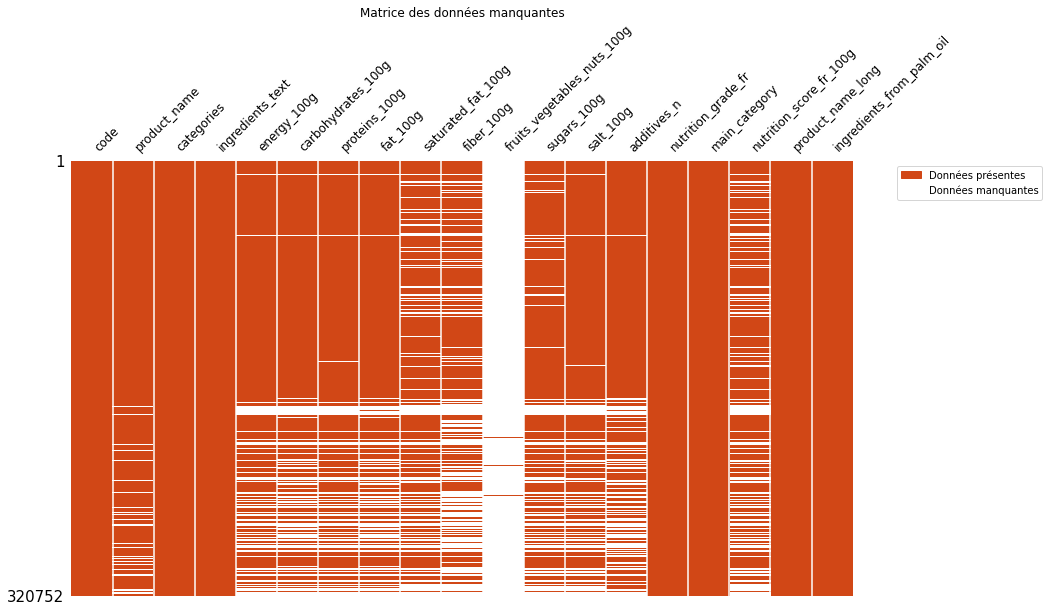

In [36]:
pk.matrix_vm(data, (14,8), (0.82, 0.28, 0.09))

Supprimons les données qui n'ont aucune colonne quantitatives renseignées (fin _100g).
En effet, ces colonnes nous permettront de réaliser notre analyse donc il nous faut au moins une information remplie pour une donnée.

In [37]:
data=data.loc[(pd.isna(data.energy_100g)==False) | (pd.isna(data.carbohydrates_100g)==False) | (pd.isna(data.proteins_100g)==False) | (pd.isna(data.fat_100g)==False)
        | (pd.isna(data["saturated_fat_100g"])==False) | (pd.isna(data["fiber_100g"])==False)
         | (pd.isna(data["fruits_vegetables_nuts_100g"])==False)| (pd.isna(data["sugars_100g"])==False)
        | (pd.isna(data["salt_100g"])==False)]

In [38]:
data.shape

(262667, 19)

Il reste encore certaines données manquantes, mais les individus apportent suffisamment d'informations pour les conserver. Concernant la colonne fruits-vegetables-nuts, nous considérons que les données vides n'appartiennent pas aux fruits, végétaux et arachides.

Passons à la prochaine étape : Etudions chacune de nos variables.

# Analyse Univariée

### Variables quantitatives

In [39]:
data.describe().round(2)

,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,fruits_vegetables_nuts_100g,sugars_100g,salt_100g,additives_n,nutrition_score_fr_100g
count,261113.00,243588.00,259906.00,243891.00,229554.00,200886.00,3036.00,244971.00,255510.00,235455.00,221020.00
mean,1141.91,32.07,7.08,12.73,5.13,2.86,31.46,16.00,2.03,1.99,9.17
std,6447.15,29.73,8.41,17.58,8.01,12.87,31.97,22.33,128.27,2.51,9.06
min,0.00,0.00,-800.00,0.00,0.00,-6.70,0.00,-17.86,0.00,0.00,-15.00
25%,377.00,6.00,0.70,0.00,0.00,0.00,0.00,1.30,0.06,0.00,1.00
50%,1100.00,20.60,4.76,5.00,1.79,1.50,23.00,5.71,0.58,1.00,10.00
75%,1674.00,58.33,10.00,20.00,7.14,3.60,51.00,24.00,1.37,3.00,16.00
max,3251373.00,2916.67,430.00,714.29,550.00,5380.00,100.00,3520.00,64312.80,31.00,40.00


il semble qu'il y a ait des données aberrantes. Nous avons des données négatives pour certaines variables.
Et nous avons des maximums étonnant comparés au 3ème quartile. Même si l'écart-type n'est pas très important.

Traçons des stripplots pour toutes nos variables quantitatives.

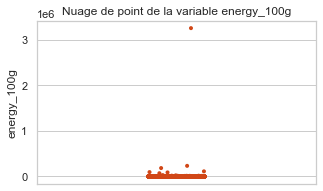

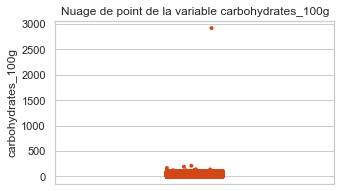

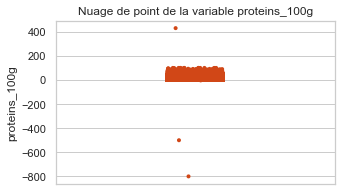

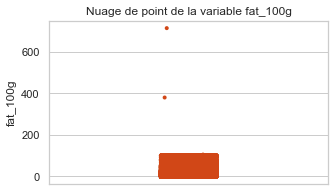

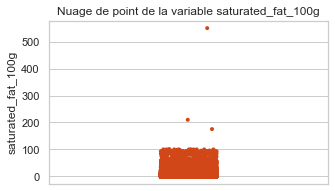

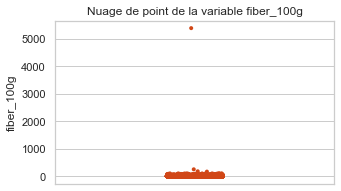

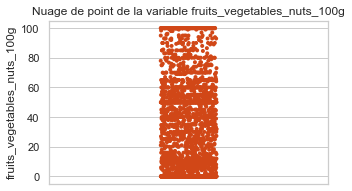

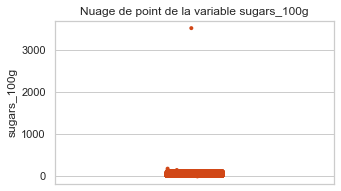

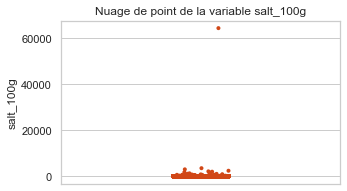

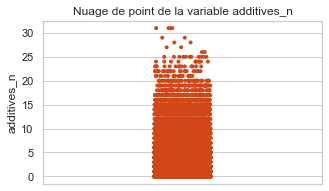

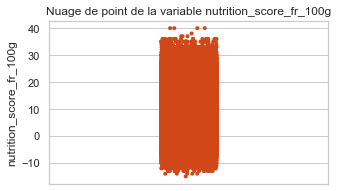

In [40]:
for col in data.select_dtypes(include=['float64']).columns:
    pk.graph_stripplot(data,col, "Nuage de point de la variable "+col,(5,3),(0.82, 0.28, 0.09))

WEB : l'Aliment le plus calorique 900 calories. Nous pouvons donc supprimer les données supérieures ou égales à 901 calories.

source : https://sante.journaldesfemmes.fr/calories/classement/aliments/calories (provenant de l'Anses)

In [41]:
data=pk.delete_outliers_UPPER(data, data['energy_100g'], 901)

Pour l'instant pour chacunes de ces colonnes, nous pouvons supprimer toutes les données supérieures à la portion de 100g et inférieures à 0.

Nous pourrions calculer l'écart-interquartile, mais celui-ci ne serait pas adapté à ces données. En effet certains aliments peuvent être très proche de 100g et d'autres proche de 0.

Calculons quand même un exemple pour la variable energy_100g

In [42]:
pk.outliers(data, data['energy_100g'],0)

159.0


,sub,values
0,IQR,393.0
1,Upper Bound,1141.5
2,Lower Bound,-430.5
3,Sum outliers,0.0
4,percentage outliers,0.0


Nous obtenons un écart-interquartile de 1 148 pour la valeur haute (donc largement au-dessus de 100g).
Et nous obtenons une valeur inférieur à 0 pour les valeurs basses. Ce qui n'est pas possible pour les nutritions d'un aliment.

Ce calcul n'est donc pas adaptées à nos données car elles sont irréelles par rapport aux aliments.

Supprimons les données supérieures à 100g et inférieurs ou égales à 0.

In [43]:

data=pk.delete_outliers_UPPER(data, data['carbohydrates_100g'], 100)
data=pk.delete_outliers_UPPER(data, data['proteins_100g'], 100)
data=pk.delete_outliers_UPPER(data, data['fat_100g'], 100)
data=pk.delete_outliers_UPPER(data, data['saturated_fat_100g'], 100)
data=pk.delete_outliers_UPPER(data, data['fiber_100g'], 100)
data=pk.delete_outliers_UPPER(data, data['sugars_100g'], 100)
data=pk.delete_outliers_UPPER(data, data['salt_100g'], 100)

data=pk.delete_outliers_LOWER(data, data['energy_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['carbohydrates_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['proteins_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['fat_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['saturated_fat_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['fiber_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['sugars_100g'], 0)
data=pk.delete_outliers_LOWER(data, data['salt_100g'], 0)

Retraçons nos stripplot.

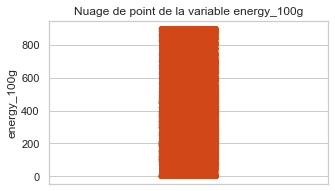

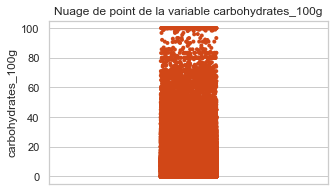

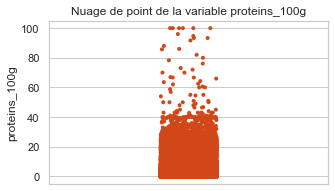

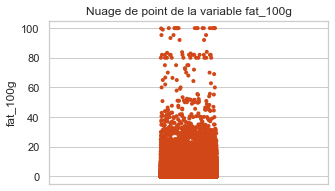

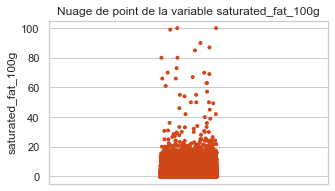

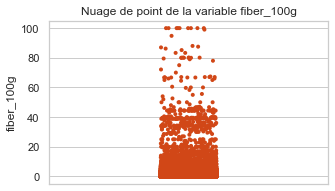

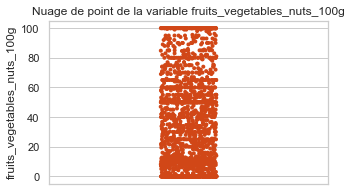

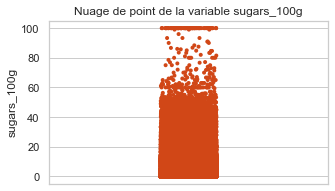

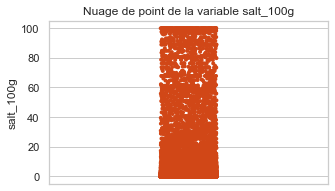

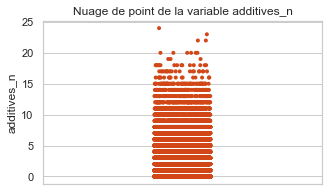

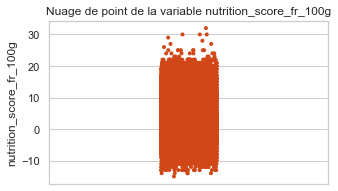

In [44]:
for col in data.select_dtypes(include=['float64']).columns:
    pk.graph_stripplot(data,col, "Nuage de point de la variable "+col,(5,3), (0.82, 0.28, 0.09))

Regardons plus précisément les variables proteins_100g, saturated-fat_100g, fiber_1100g, il semble qu'il reste des valeurs aberrantes.

Commençons par la variable proteins_100g

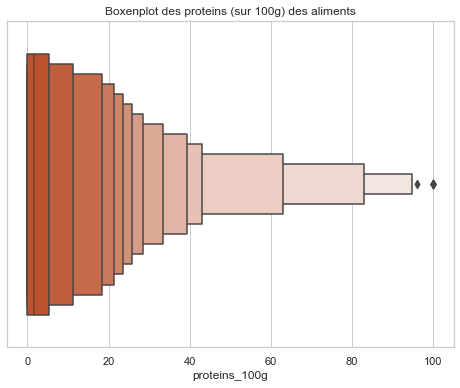

In [45]:
pk.graph_boxenplot(data, "proteins_100g", (0.82, 0.28, 0.09),"Boxenplot des proteins (sur 100g) des aliments",(8,6))

Les aliments les plus protéinés :
https://sante.journaldesfemmes.fr/calories/classement/aliments/proteines
gélatine alimentaire	87,6 g

Supprimons les données qui dépassent 89g.

In [46]:
data = data.loc[data["proteins_100g"]<=89]

Regardons à nouveau la boxenplot de la variable proteins_100g.

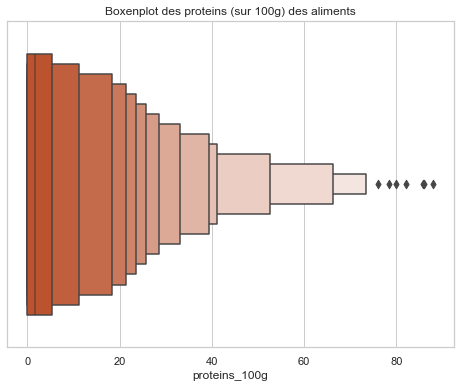

In [47]:
pk.graph_boxenplot(data, "proteins_100g", (0.82, 0.28, 0.09),"Boxenplot des proteins (sur 100g) des aliments",(8,6))

Il reste quelques valeurs extrêmes mais elles sont cohérentes, donc on les conserve pour ne pas perdre d'information.

Regardons à présent la variable saturated-fat_100g

On sait que l'aliment qui contient le plus d'acide gras saturés est : 

pain de friture	92,6 g

source: https://sante.journaldesfemmes.fr/calories/classement/aliments/acides-gras-satures

In [48]:
data = data.loc[data["saturated_fat_100g"]<=93]

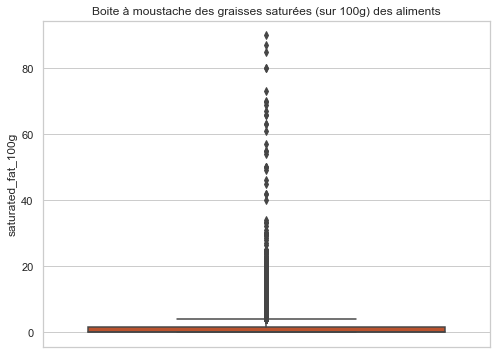

In [49]:
pk.graph_boxplot(data, "saturated_fat_100g", "Boite à moustache des graisses saturées (sur 100g) des aliments", (0.82, 0.28, 0.09), (8,6))

Il reste des données extrêmes. Mais elles sont cohérentes. Donc nous allons les conserver.

Regardons la variable fiber_100g

Pour info, l'aliment le plus riche en fibre est la cannelle avec 43,5g (pour 100g).

source: https://sante.journaldesfemmes.fr/calories/classement/aliments/fibres

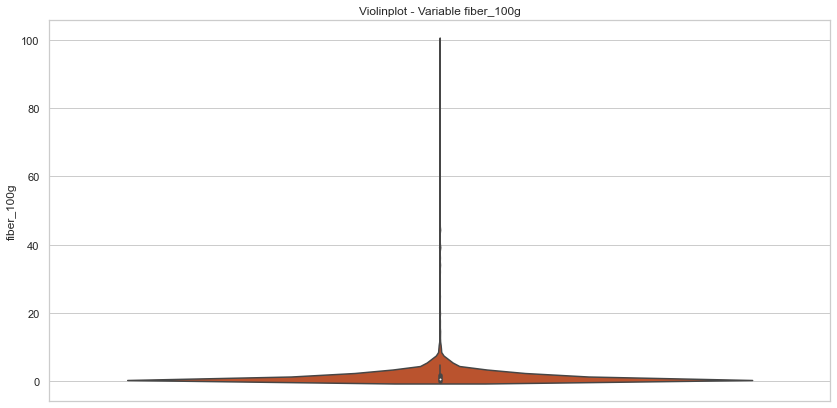

In [50]:
pk.graph_violinplot(data["fiber_100g"], "Violinplot - Variable fiber_100g", "fiber_100g", (0.82, 0.28, 0.09), (14,7))

In [51]:
data = data.loc[data["fiber_100g"]<=45]

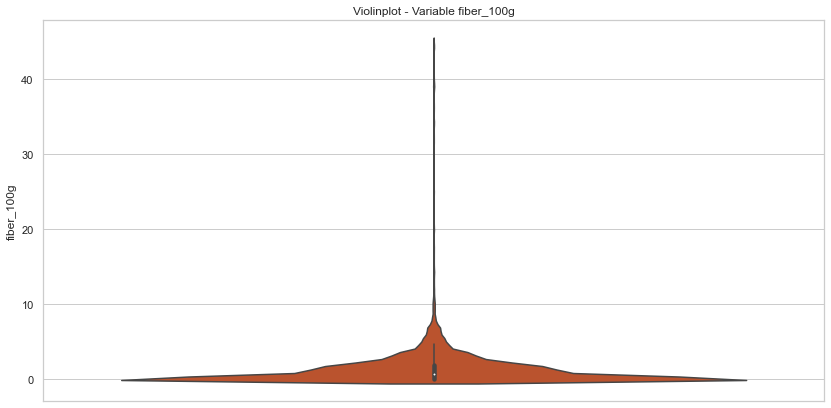

In [52]:
pk.graph_violinplot(data["fiber_100g"], "Violinplot - Variable fiber_100g", "fiber_100g", (0.82, 0.28, 0.09), (14,7))

https://sante.journaldesfemmes.fr/calories/classement/aliments/sel
	sel non iodé non fluoré	39100 mg

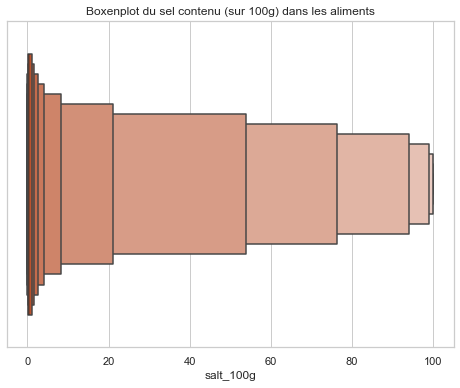

In [53]:
pk.graph_boxenplot(data, "salt_100g", (0.82, 0.28, 0.09),"Boxenplot du sel contenu (sur 100g) dans les aliments",(8,6))

In [54]:
data = data.loc[data["salt_100g"]<=40]

Maintenant que nous avons supprimé nos données aberrantes, nous pouvons recalculer nos statistiques.

In [55]:
data.describe().round(2)

,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,fruits_vegetables_nuts_100g,sugars_100g,salt_100g,additives_n,nutrition_score_fr_100g
count,76340.00,69238.00,76485.00,69228.00,76485.00,76485.00,1279.00,76109.00,76485.00,67127.00,75829.00
mean,394.54,12.27,4.82,3.14,1.13,1.40,36.99,6.50,0.90,1.66,2.40
std,244.48,11.27,6.26,4.63,2.31,2.78,33.01,8.37,2.04,2.22,5.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00
25%,196.00,4.71,0.70,0.00,0.00,0.00,6.20,0.90,0.08,0.00,-1.00
50%,351.00,9.86,2.65,1.11,0.10,0.80,33.00,3.38,0.47,1.00,1.00
75%,577.00,16.43,6.14,4.65,1.45,1.90,60.00,9.58,1.02,2.00,5.00
max,901.00,100.00,86.00,100.00,90.00,45.00,100.00,100.00,40.00,24.00,32.00


On a des données à -15 pour les nutritions score, mais cela est possible :
https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique-en voir page 27

Le min est -15 et le max 40.

Etudions les distributions de nos différentes variables.

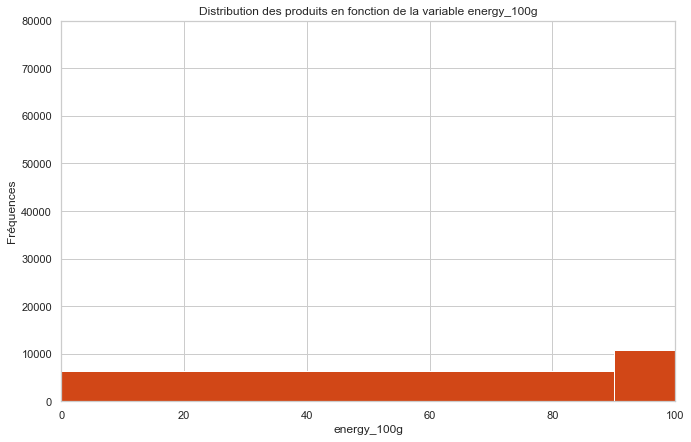

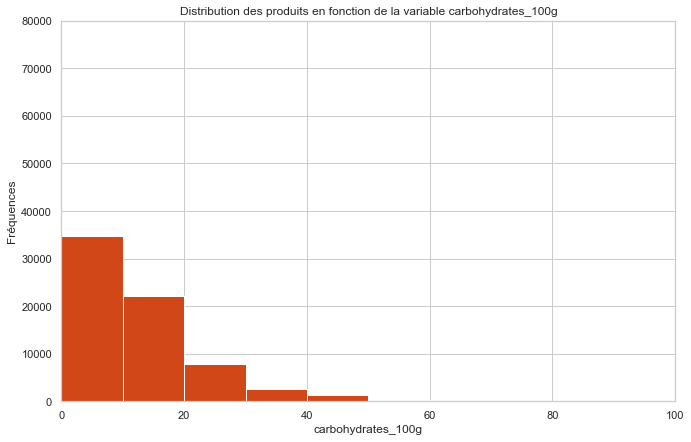

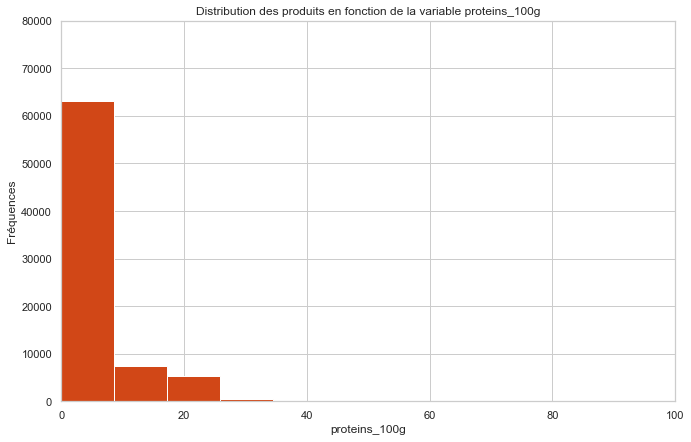

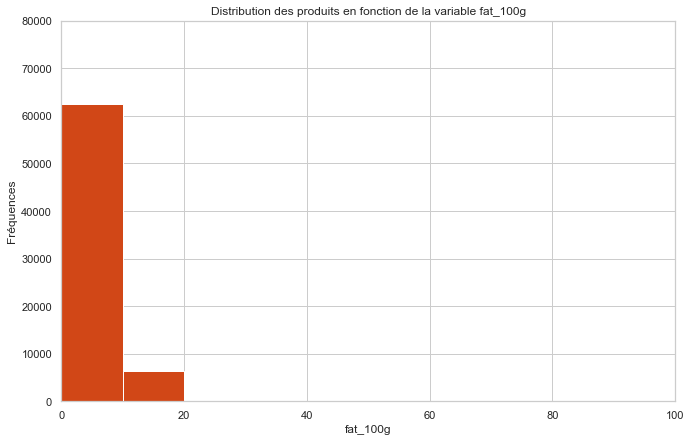

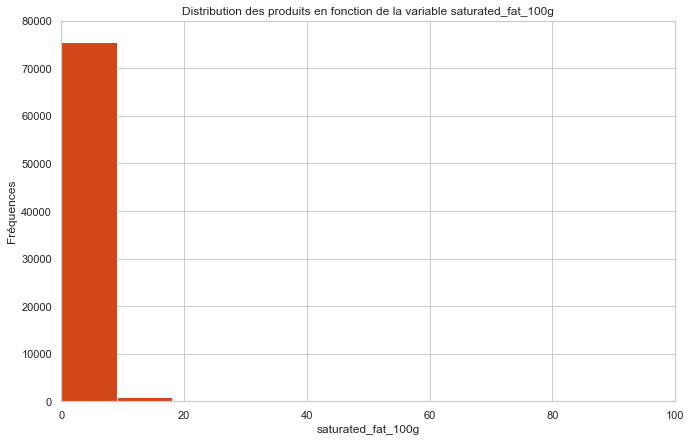

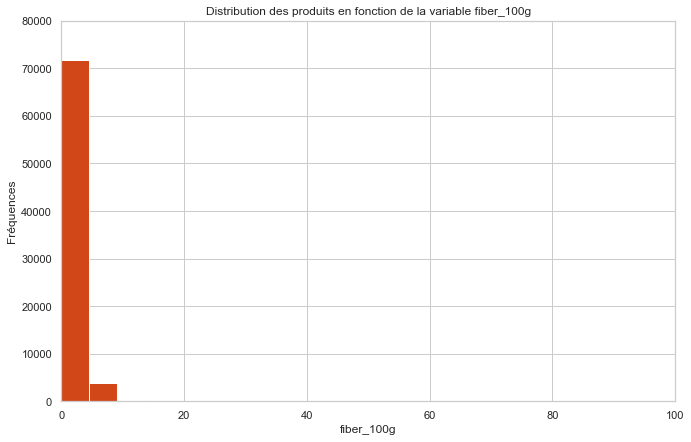

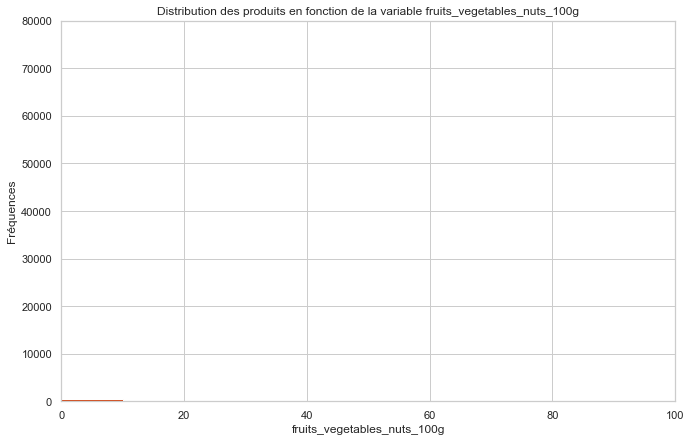

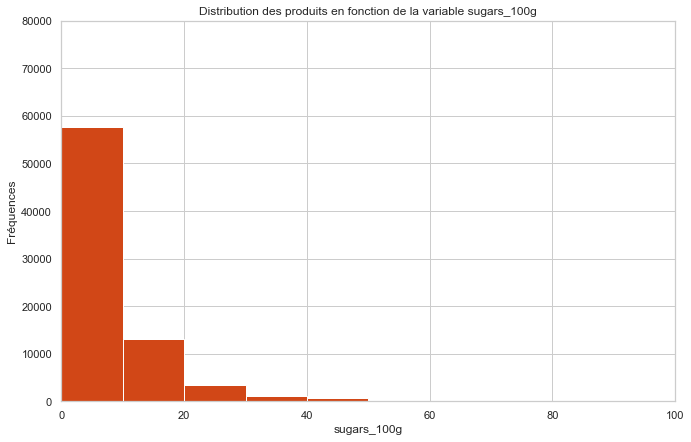

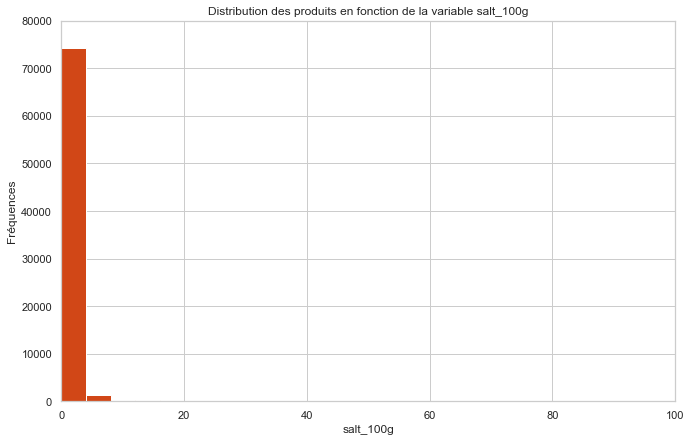

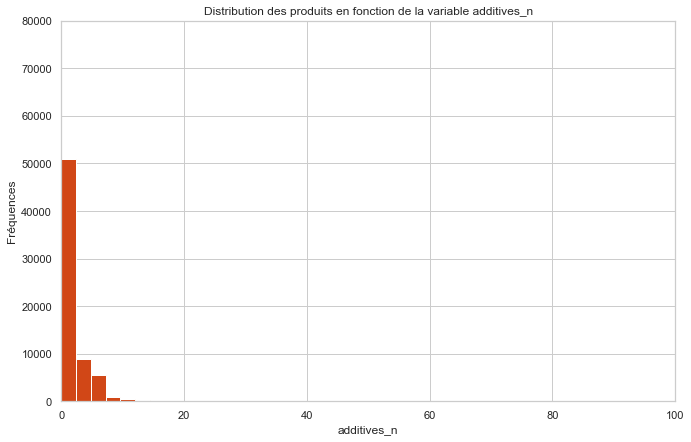

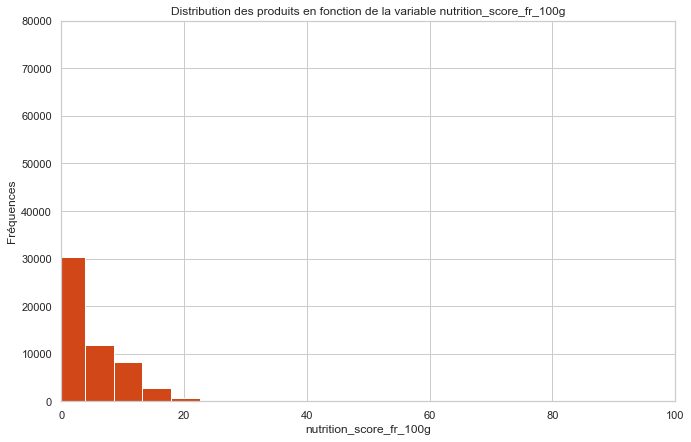

In [56]:
for col in data.select_dtypes(include=['float64']).columns:
    pk.graph_hist_sans_intervalles(data[col] ,"Distribution des produits en fonction de la variable "+col,(0.82, 0.28, 0.09),
          0,100, 2, 0, 80000, col, 'Fréquences',(11,7))

On remarque que la distribution des variables sont asymétriques vers la gauche 

Excepté pour la variable energie qui est applatie

Vérifions comment nos variables se comportent par rapport à la loi normale grace au test de kurtosis.

Si γ2=0 , alors la distribution a le même aplatissement que la distribution normale.

Si γ2>0 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.

Si γ2<0 , alors les observations sont moins concentrées : la distribution est plus aplatie.

In [57]:
for col in data.select_dtypes(include=['float64']).columns:
    data_i=data[col].loc[pd.isna(data[col])==False]
    print("colonne: "+col+" "+ str(data[col].kurtosis()))

colonne: energy_100g -0.8771083050696888
colonne: carbohydrates_100g 8.425396141382253
colonne: proteins_100g 5.8136255800476535
colonne: fat_100g 45.35214653576726
colonne: saturated_fat_100g 174.5621010173351
colonne: fiber_100g 102.67949997529975
colonne: fruits_vegetables_nuts_100g -0.9634919281211456
colonne: sugars_100g 12.38547220323349
colonne: salt_100g 121.19008364148097
colonne: additives_n 6.771188576710033
colonne: nutrition_score_fr_100g 0.5798871930207858


Test de skewness

Si γ1=0 alors la distribution est symétrique.

Si γ1>0 alors la distribution est étalée à droite.

Si γ1<0 alors la distribution est étalée à gauche.

In [58]:
for col in data.select_dtypes(include=['float64']).columns:
    data_i=data[col].loc[pd.isna(data[col])==False]
    print("colonne: "+col+" "+ str(data[col].skew()))

colonne: energy_100g 0.4328631560957092
colonne: carbohydrates_100g 2.1911683504396713
colonne: proteins_100g 2.085040471114707
colonne: fat_100g 3.8248729848471257
colonne: saturated_fat_100g 7.940707225504832
colonne: fiber_100g 8.374141490029366
colonne: fruits_vegetables_nuts_100g 0.5204042253627206
colonne: sugars_100g 2.7214374189334403
colonne: salt_100g 9.316210605576707
colonne: additives_n 2.159138307416816
colonne: nutrition_score_fr_100g 0.7997865236183036


Test de la loi normal

 h0 =  la distribution est normale.

h1=la distribution n'est pas normale

In [59]:
for col in data.select_dtypes(include=['float64']).columns:
    data_i=data[col].loc[pd.isna(data[col])==False]
    print("colonne: "+col+" "+ str(scipy.stats.normaltest(data_i)))

colonne: energy_100g NormaltestResult(statistic=11581.718614658319, pvalue=0.0)
colonne: carbohydrates_100g NormaltestResult(statistic=33457.87009247808, pvalue=0.0)
colonne: proteins_100g NormaltestResult(statistic=32997.63170699808, pvalue=0.0)
colonne: fat_100g NormaltestResult(statistic=61181.25587148829, pvalue=0.0)
colonne: saturated_fat_100g NormaltestResult(statistic=107975.38253295151, pvalue=0.0)
colonne: fiber_100g NormaltestResult(statistic=107658.02642989038, pvalue=0.0)
colonne: fruits_vegetables_nuts_100g NormaltestResult(statistic=283.00281931876043, pvalue=3.521426299464286e-62)
colonne: sugars_100g NormaltestResult(statistic=45968.26784878046, pvalue=0.0)
colonne: salt_100g NormaltestResult(statistic=114191.49092814085, pvalue=0.0)
colonne: additives_n NormaltestResult(statistic=30706.28896077058, pvalue=0.0)
colonne: nutrition_score_fr_100g NormaltestResult(statistic=6983.114172589123, pvalue=0.0)


### Variables qualitatives

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76485 entries, 173 to 320768
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         76485 non-null  object 
 1   product_name                 75662 non-null  object 
 2   categories                   76485 non-null  object 
 3   ingredients_text             76485 non-null  object 
 4   energy_100g                  76340 non-null  float64
 5   carbohydrates_100g           69238 non-null  float64
 6   proteins_100g                76485 non-null  float64
 7   fat_100g                     69228 non-null  float64
 8   saturated_fat_100g           76485 non-null  float64
 9   fiber_100g                   76485 non-null  float64
 10  fruits_vegetables_nuts_100g  1279 non-null   float64
 11  sugars_100g                  76109 non-null  float64
 12  salt_100g                    76485 non-null  float64
 13  additives_n  

In [61]:
data[["categories", "ingredients_text", "nutrition_grade_fr", "main_category", "product_name_long", "ingredients_from_palm_oil"]].describe(include='all').round(2)

,categories,ingredients_text,nutrition_grade_fr,main_category,product_name_long,ingredients_from_palm_oil
count,76485,76485,76485,76485,76485,76485
unique,9407,56128,6,745,55842,2
top,AUTRES,NON RENSEIGNE,B,AUTRES,NON RENSEIGNE,NON
freq,58969,9358,24625,58969,823,72309


In [62]:
data_autres=data.loc[data['main_category']!="AUTRES"]

In [63]:
data_autres["main_category"].value_counts(normalize=True)

EN:CANNED-FOODS                     0.086721
EN:BEVERAGES                        0.066682
EN:FROZEN-FOODS                     0.056063
EN:MEALS                            0.053208
EN:DESSERTS                         0.048927
                                      ...   
EN:SIROP                            0.000057
IT:PIATTO-PRONTO-DI-CARNI-BOVINE    0.000057
EN:TOMATO-KETCHUP                   0.000057
ES:SAL-LI                           0.000057
FR:CROCCATELLI                      0.000057
Name: main_category, Length: 744, dtype: float64

La partie Autres est surreprésentée, ces colonnes ne sont pas exploitables.

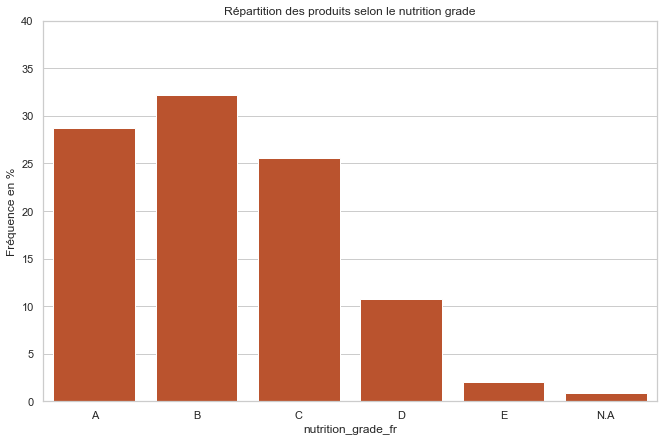

In [64]:
pk.graph_barplot(data['nutrition_grade_fr'], "Répartition des produits selon le nutrition grade", 
              (0.82, 0.28, 0.09),
              0, 40, "nutrition_grade_fr", "Fréquence en %",0,1, (11,7))


Assez équilibré.

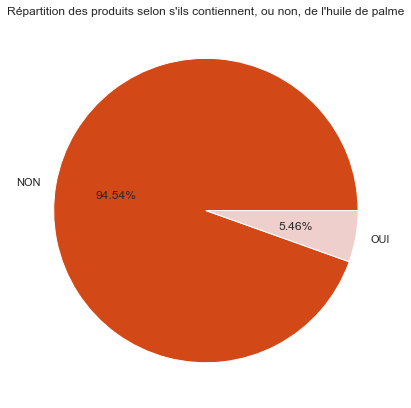

In [65]:

pk.graph_pie(data["ingredients_from_palm_oil"], "ingredients_from_palm_oil", "Répartition des produits selon s'ils contiennent, ou non, de l'huile de palme",['#D34817', '#EFCFCC'], (11,7))

In [66]:
data["product_name_long"].value_counts(normalize=True)

NON RENSEIGNE                                                      0.010760
ICE CREAM                                                          0.002628
CUT GREEN BEANS                                                    0.001791
TOMATO SAUCE                                                       0.001778
SALSA                                                              0.001713
                                                                     ...   
CIABATTA BAGUETTE                                                  0.000013
ORGANIC TOMATOES DICED & FIRE ROASTED WITH ORGANIC GREEN CHILES    0.000013
JUISI, ANTIOXIDANTS & ELECTROLYTES JUICE, WATERMELON               0.000013
GOURMET COFFEE CREAMER, FAT FREE, CARAMEL MACCHIATA                0.000013
CREVETTES GRISES DECORTIQUEES                                      0.000013
Name: product_name_long, Length: 55842, dtype: float64

# Est-ce que le nutriscore contribue à améliorer la santé des français ? Est ce que le nutriscore permet de manger équilibrer ?


## Quels sont ses caractéristiques ?

#### Techniquement, voici les éléments qui agit sur le nutriscore :

Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).


## Est - ce que si nous mangeons que des aliments avec un nutriscore A, serons - nous en bonne santé ?

### Comparons les informations  des différentes notes.

Excluons les données non renseignées du Nutriscore.

In [67]:
dataN = data.loc[data["nutrition_grade_fr"]!="N.A"].sort_values(by=["nutrition_grade_fr"])


### Analyse bivariée : Etudions le lien entre la variable nutrition_grade_fr et les autres variables.

In [68]:
dataN.describe()

,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,fruits_vegetables_nuts_100g,sugars_100g,salt_100g,additives_n,nutrition_score_fr_100g
count,75829.000000,68598.000000,75829.000000,68580.000000,75829.000000,75829.000000,1274.000000,75829.000000,75829.000000,66510.000000,75829.000000
mean,394.822803,12.260601,4.802859,3.114437,1.125763,1.399999,37.063344,6.497647,0.891450,1.661194,2.403619
std,244.420509,11.158542,6.232808,4.555526,2.287982,2.765944,33.045171,8.338660,2.029594,2.221667,5.475433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,197.000000,4.710000,0.700000,0.000000,0.000000,0.000000,6.100000,0.900000,0.080000,0.000000,-1.000000
50%,352.000000,9.900000,2.650000,1.110000,0.100000,0.800000,33.000000,3.400000,0.464820,1.000000,1.000000
75%,577.000000,16.467500,6.100000,4.610000,1.450000,1.900000,60.000000,9.580000,1.016000,2.000000,5.000000
max,901.000000,100.000000,86.000000,100.000000,90.000000,45.000000,100.000000,100.000000,40.000000,24.000000,32.000000


In [69]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [70]:
for col in data.select_dtypes(include=['float64']).columns:
    print(col)
    print(dataN.groupby("nutrition_grade_fr")[col].agg([np.median,np.min, np.max, percentile(25), percentile(75)]))

energy_100g
                    median  amin   amax  percentile_25  percentile_75
nutrition_grade_fr                                                   
A                    310.0   0.0  901.0          184.0          448.0
B                    259.0   0.0  901.0          155.0          444.0
C                    448.0   0.0  901.0          259.0          644.0
D                    699.0   0.0  901.0          494.0          837.0
E                    213.0   0.0  896.0          176.0          699.0
carbohydrates_100g
                    median  amin    amax  percentile_25  percentile_75
nutrition_grade_fr                                                    
A                     9.29   0.0   90.58            NaN            NaN
B                     8.87   0.0  100.00            NaN            NaN
C                    11.10   0.0  100.00            NaN            NaN
D                    12.70   0.0  100.00            NaN            NaN
E                    10.90   0.0  100.00            N

moyenne energy_100g = 394.8228034129423
moyenne carbohydrates_100g = 12.26060059914283
moyenne proteins_100g = 4.802859123818064
moyenne fat_100g = 3.114436719160105
moyenne saturated_fat_100g = 1.1257630013583193
moyenne fiber_100g = 1.3999988816943385
moyenne fruits_vegetables_nuts_100g = 37.06334379905808
moyenne sugars_100g = 6.4976465099104574
moyenne salt_100g = 0.8914499359272311
moyenne additives_n = 1.6611938054427906
moyenne nutrition_score_fr_100g = 2.4036186683195084


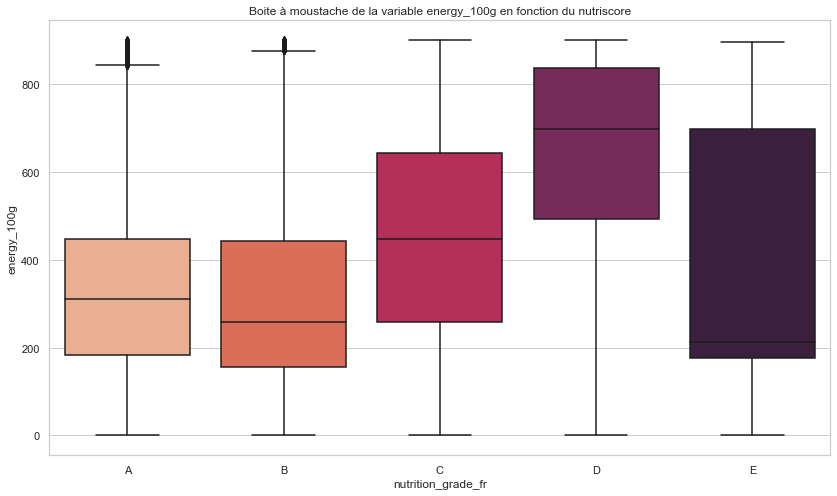

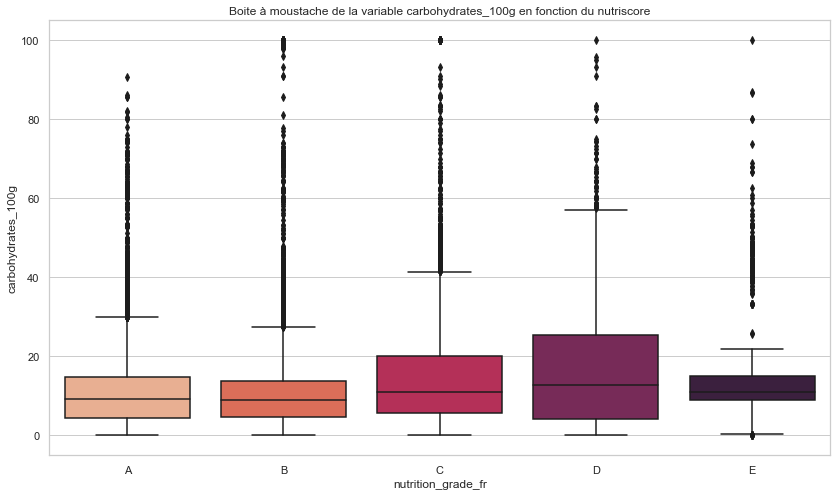

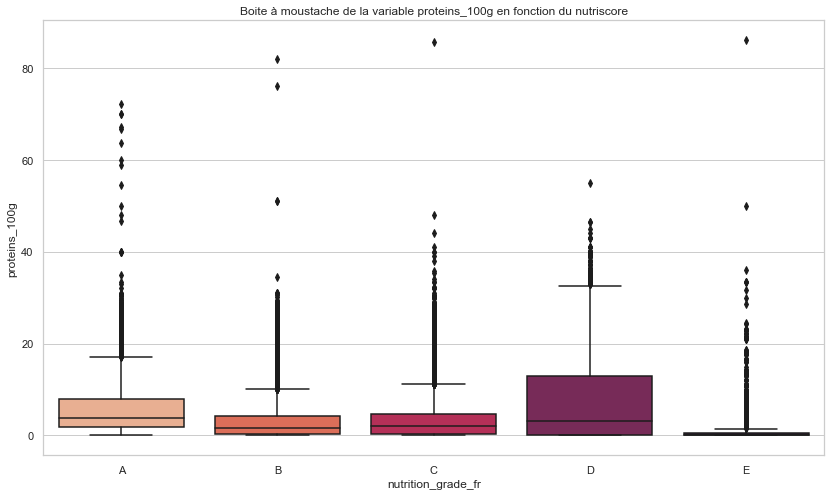

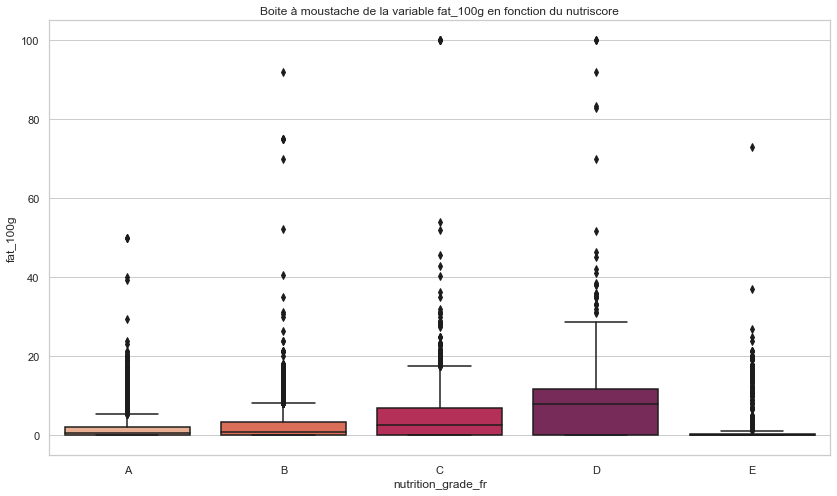

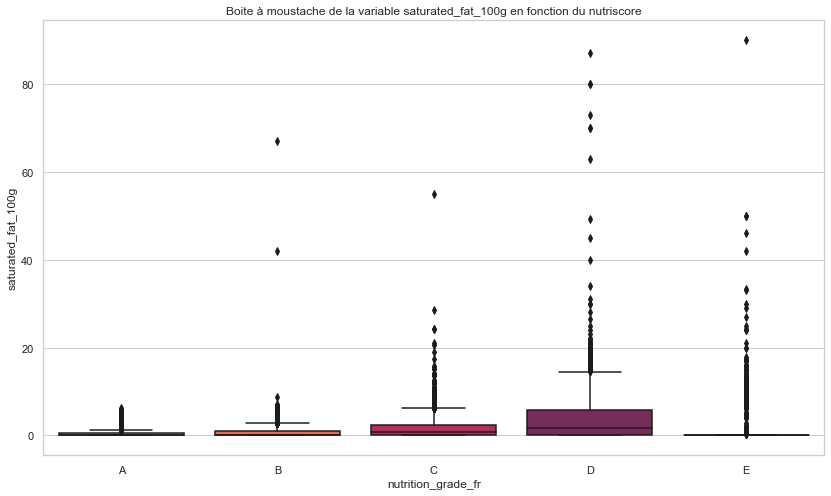

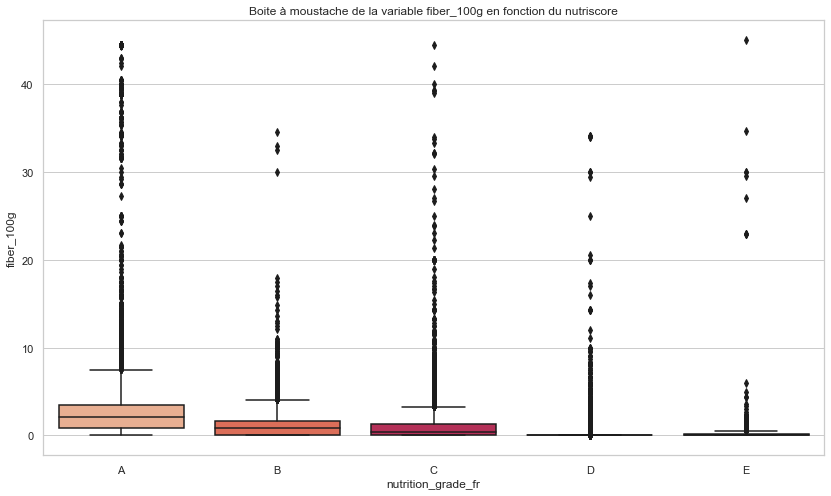

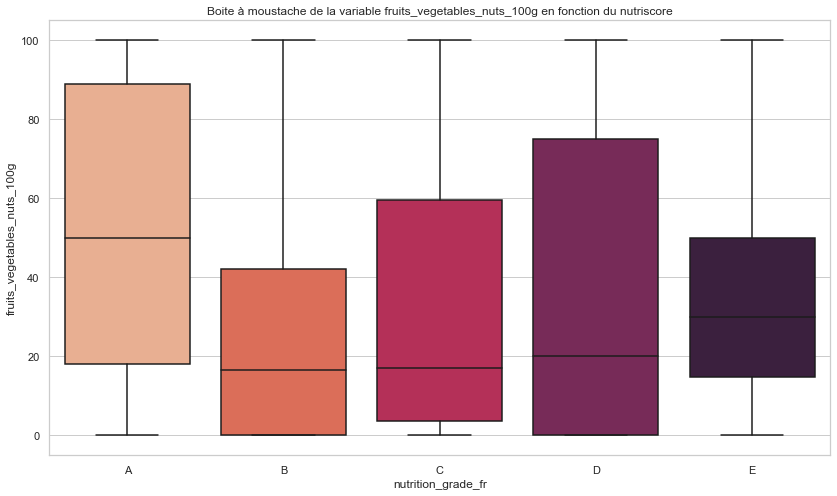

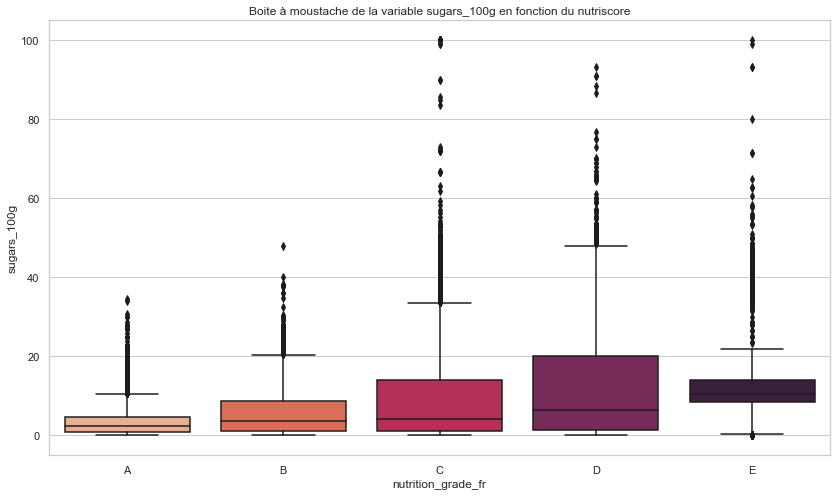

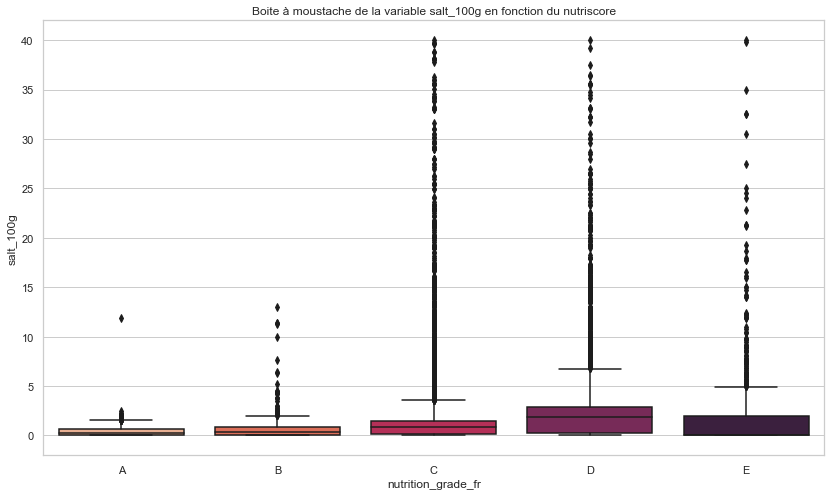

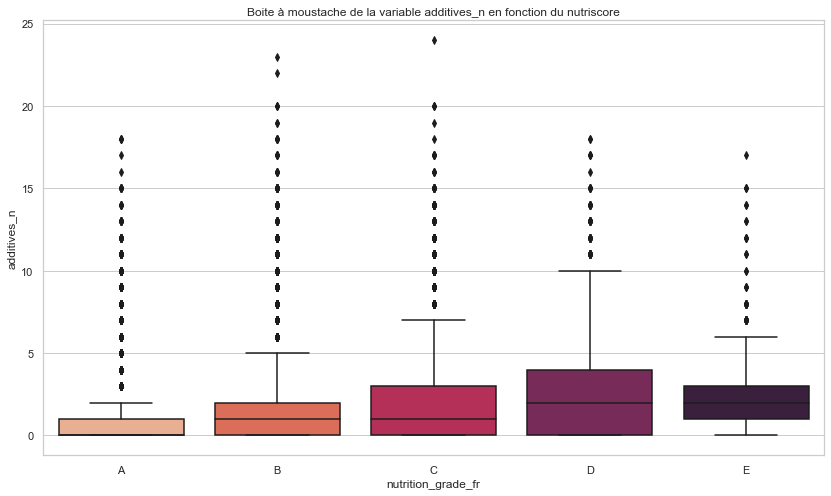

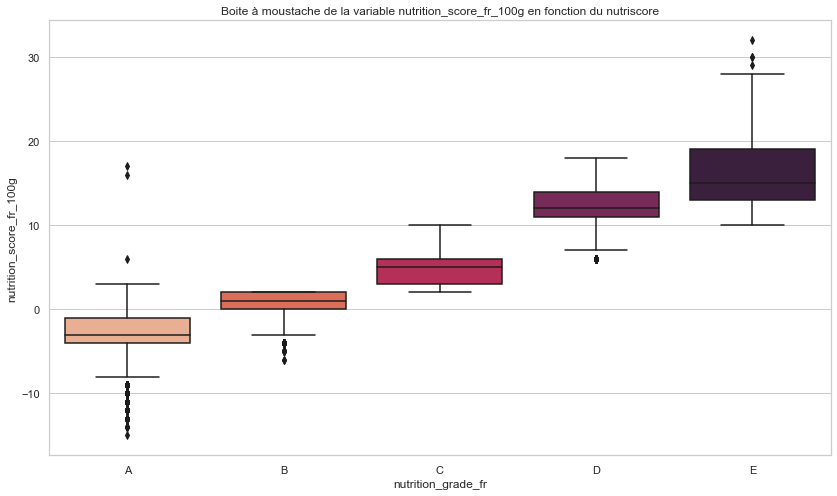

In [71]:
for col in data.select_dtypes(include=['float64']).columns:
    print("moyenne "+col +" = "+str(dataN[col].mean()))
    pk.graph_boxplot_by_group(dataN, col,"nutrition_grade_fr", "Boite à moustache de la variable "+col+" en fonction du nutriscore", "rocket_r", (14,8))

Grâce à ces boites à moustache, nous remarquons qu'ils restent des données extrêmes. Mais dans ce contexte, nous devons les conserver pour ne pas perdre d'information.

Les boites à moustache sont peu dispersées même si en fonction des notes, leur dispersion peuvent plus ou moins varié.

Comment pouvons - nous décrire les aliments avec une note A ?
- riches en fibres et en proteines
- peu de sel, de sucre et de matières grasses (y compris en graisses saturés)
- contiennent des fruits, végétaux ou des arachides
- faible en additifs
- apport en energie proche de la moyenne

Comment pouvons - nous décrire les aliments avec une note E ?
- riches en sucre, en additif et en glucides
- pauvres en fibres, proteines, sel
- une energie qui varie beaucoup dans les extrêmes.

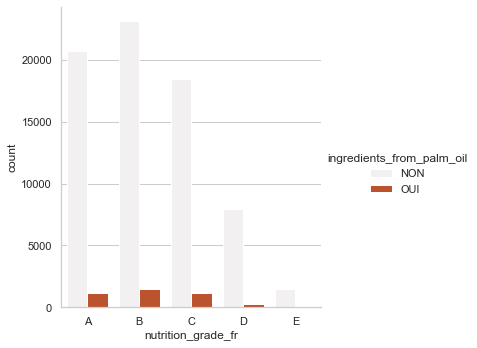

In [72]:
sns.catplot(x = "nutrition_grade_fr", hue = "ingredients_from_palm_oil", data = dataN, kind = "count", color=(0.82, 0.28, 0.09))


Les produits qui contiennent potentiellement de l'huile de palme ont les meilleurs notes.

### Confirmons nos résultats précédents en vérifiant le lien entre nos variables quantitatives et le grade du nutriscore

Pour cela, nous pourrions modéliser nos données en réalisant une ANOVA.
Mais cela suppose 3 choses : 
- l'indépendance entre chaque groupe
- l'égalité des variances
- la normalité des résidus (cela permet de ne pas affirmer qu'il existe une différence de moyenne entre les groupes qui serait causée par le hasard).

### L'indépendance entre nos groupes

Selon le contexte, nous savons que chaque lettre du nutriscore est indépendante car elle représente un classement des aliments.

### L'égalité des variances

Réalisons un test de bartlette afin de confirmer ce que nous avons vu lors de l'analyse bivariée.

H0 : Les variances de chaque groupe sont égales si p-value > 5%

H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

Définissons nos groupes

In [73]:
data_a=dataN.loc[data["nutrition_grade_fr"]=="A"]
data_b=dataN.loc[data["nutrition_grade_fr"]=="B"]
data_c=dataN.loc[data["nutrition_grade_fr"]=="C"]
data_d=dataN.loc[data["nutrition_grade_fr"]=="D"]
data_e=dataN.loc[data["nutrition_grade_fr"]=="E"]


Effectuons le test pour chaque variable quantitative

In [74]:
for col in data.select_dtypes(include=['float64']).columns:
    print("colonne "+col+" "+str(scipy.stats.bartlett(data_a[col], data_b[col], data_c[col], data_d[col], data_e[col])))

colonne energy_100g BartlettResult(statistic=754.2596781771684, pvalue=6.197733140805107e-162)
colonne carbohydrates_100g BartlettResult(statistic=3460.892470782002, pvalue=0.0)
colonne proteins_100g BartlettResult(statistic=3389.1266662064177, pvalue=0.0)
colonne fat_100g BartlettResult(statistic=14687.66991319176, pvalue=0.0)
colonne saturated_fat_100g BartlettResult(statistic=65890.59851828816, pvalue=0.0)
colonne fiber_100g BartlettResult(statistic=37960.56001796603, pvalue=0.0)
colonne fruits_vegetables_nuts_100g BartlettResult(statistic=4674.976347597441, pvalue=0.0)
colonne sugars_100g BartlettResult(statistic=33760.37858893314, pvalue=0.0)
colonne salt_100g BartlettResult(statistic=111134.9159850324, pvalue=0.0)
colonne additives_n BartlettResult(statistic=2035.939754930349, pvalue=0.0)
colonne nutrition_score_fr_100g BartlettResult(statistic=24713.246137881066, pvalue=0.0)


Nous rejetons h0 pour toutes nos variables. Les variances ne sont pas égales.

La deuxième condition pour effectuer une anova n'est pas validée.


In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('energy_100g ~ nutrition_grade_fr ', data=dataN).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,7.919378e+08,4.0,4015.902278,0.0
Residual,3.738132e+09,75824.0,NaN,NaN


H0 : les moyennes sont équivalent dans les groupes
H1 : les moyennes sont différentes
    
P<0.05 on rejette H0. et on admet H1.

#### Les résidus doivent suivre une loi normale

In [76]:
import numpy as np
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro
model = ols('energy_100g ~ nutrition_grade_fr', data=dataN).fit()
scipy.stats.normaltest(model.resid)

NormaltestResult(statistic=2149.7840480871037, pvalue=0.0)

~H0 : Les résidus suivent une loi normale si p-value > 5%~
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

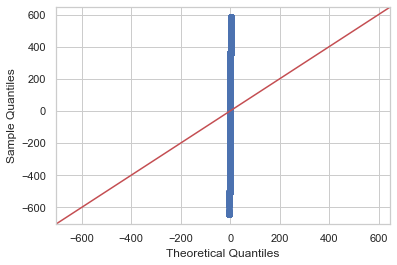

In [77]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pylab
from scipy.stats import shapiro
model = ols('energy_100g ~ nutrition_grade_fr', data=dataN).fit()


sm.qqplot(model.resid, line='45')
pylab.show()

### Utilisons le test de Krusdall (utilise les rangs au lieu des moyennes)

H0 :  la médiane de la population de tous les groupes est égale
H1 :  la médiane de la population d'au moins un groupe n'est pas égale

Test Krusdall(utilise mediane et quantile)

In [78]:
for col in data.select_dtypes(include=['float64']).columns:
    print("colonne "+col+": "+ str(scipy.stats.kruskal(*[group[col] for name, group in dataN.groupby("nutrition_grade_fr")])))

colonne energy_100g: KruskalResult(statistic=12054.297117811882, pvalue=0.0)
colonne carbohydrates_100g: KruskalResult(statistic=nan, pvalue=nan)
colonne proteins_100g: KruskalResult(statistic=5737.987125108822, pvalue=0.0)
colonne fat_100g: KruskalResult(statistic=nan, pvalue=nan)
colonne saturated_fat_100g: KruskalResult(statistic=6756.054390341868, pvalue=0.0)
colonne fiber_100g: KruskalResult(statistic=16617.800798543427, pvalue=0.0)
colonne fruits_vegetables_nuts_100g: KruskalResult(statistic=nan, pvalue=nan)
colonne sugars_100g: KruskalResult(statistic=5465.825516559928, pvalue=0.0)
colonne salt_100g: KruskalResult(statistic=11095.036175817382, pvalue=0.0)
colonne additives_n: KruskalResult(statistic=nan, pvalue=nan)
colonne nutrition_score_fr_100g: KruskalResult(statistic=69955.64367877875, pvalue=0.0)


Signatifivement différent on rejette H0 car pvalue<5%

Selon le test, la mediane d'un groupe sont significativement différents pour chacunes des variables.

## Conclusion Nutriscore

 les aliments avec une note A ?
- riches en fibres et en proteines 
- peu de sel, de sucre et de matières grasses (y compris en graisses saturés)
- contiennent des fruits, végétaux ou des arachides
- faible en additifs
- apport en energie proche de la moyenne

 les aliments avec une note E ?
- riches en sucre, en additif et en glucides
- pauvres en fibres, proteines, sel
- une energie qui varie beaucoup dans les extrêmes.


Cependant, nous avons besoin d'une alimentation équilibrée. 

Voici l'apport quotidien pour un adulte : 

Glucides = 250g (carbohydrates)

lipides = 50 insaturé et 20 sature

Protéines =	45 g pour une personne de 55 kg
            60 g pour une personne de 75 kg
            
Fibres =	25 à 30 g dont une moitié issue des céréales et l'autre issue des fruits et légumes
    
Donc si nous mangeons que des produits A, cela ne nous permet pas de manger équilibrer et ne permet pas d'améliorer la santé.
Comment pouvons - nous améliorer la santé des français?

# Objectif une meilleure santé pour tous : Application Smart Food

Un classement des aliments et le calcul de leur combinaison permettront d'améliorer la santé des français et les guider vers une alimentation équilibrée sans se priver.

## Classement des aliments

ACP > categoriser nutrition ?
Il nous faut exclure les données manquantes.

Nous classerons les produits contenant des fruits, vegetaux et arachides dans une catégorie à part.

In [79]:
dataacp=data.loc[(pd.isna(data.energy_100g)==False) & (pd.isna(data.carbohydrates_100g)==False) & (pd.isna(data.proteins_100g)==False) & (pd.isna(data.fat_100g)==False)
        & (pd.isna(data["saturated_fat_100g"])==False) & (pd.isna(data["fiber_100g"])==False)
         & (pd.isna(data["sugars_100g"])==False)
        & (pd.isna(data["salt_100g"])==False)
                 & (pd.isna(data["additives_n"])==False)]

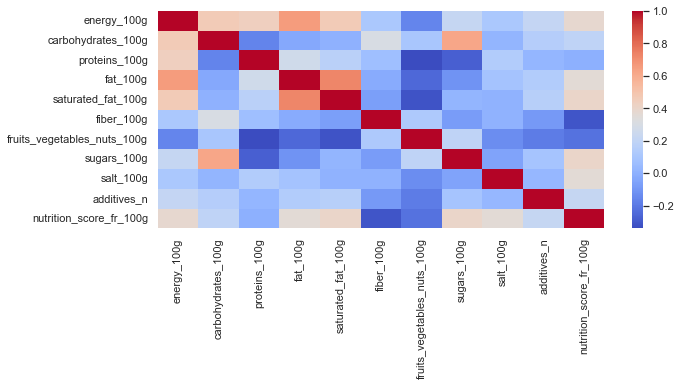

In [80]:
sns.set(rc={'figure.figsize':(10,4)})

data_corr = data.corr()

ax = sns.heatmap(data_corr, xticklabels = data_corr.columns , 
                 yticklabels = data_corr.columns, cmap = 'coolwarm')

In [81]:
data_test=dataacp.drop(columns = ["energy_100g","sugars_100g", "salt_100g", "additives_n","code", "categories", "ingredients_text", "nutrition_grade_fr", "main_category", "nutrition_score_fr_100g", "product_name_long","product_name", "ingredients_from_palm_oil", "fruits_vegetables_nuts_100g"])

In [82]:
data_test.describe()

,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g
count,66247.000000,66247.000000,66247.000000,66247.000000,66247.000000
mean,12.239514,4.739492,3.091664,1.051551,1.446071
std,11.103234,6.139104,4.542911,2.021462,2.827446
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.710000,0.700000,0.000000,0.000000,0.000000
50%,9.900000,2.540000,1.060000,0.000000,0.800000
75%,16.470000,6.060000,4.550000,1.330000,2.000000
max,100.000000,86.000000,100.000000,87.000000,45.000000


In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# suppression des colonnes non numériques
WGI_num0 = dataacp.drop(columns = ["energy_100g","sugars_100g", "salt_100g","saturated_fat_100g", "additives_n","code", "categories", "ingredients_text", "nutrition_grade_fr", "main_category", "nutrition_score_fr_100g", "product_name_long","product_name", "ingredients_from_palm_oil", "fruits_vegetables_nuts_100g"])


In [84]:
WGI_num = StandardScaler().fit_transform(WGI_num0)

pca = PCA()
pca.fit(WGI_num)

PCA()

In [85]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.38184277 1.21582993 0.82042768 0.58196   ]
[0.34545548 0.30395289 0.20510382 0.1454878 ]


In [86]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,1.381843,35.0,35.0
1,Dim2,1.215830,30.0,65.0
2,Dim3,0.820428,21.0,85.0
3,Dim4,0.581960,15.0,100.0


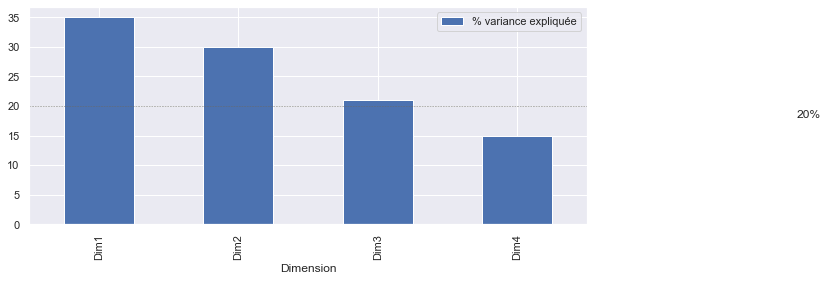

In [87]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "20%") # ajout de texte
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [88]:
WGI_pca = pca.transform(WGI_num)

In [89]:
# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "Dim3" : WGI_pca[:,2],
    "product": dataacp["product_name"],
    "nutrition_grade_fr" : dataacp["nutrition_grade_fr"]
})

# Résultat (premières lignes)
WGI_pca_df.head()

,Dim1,Dim2,Dim3,product,nutrition_grade_fr
173,-0.587555,-0.465092,-0.506452,FRESH ORGANIC CARROTS,A
185,0.820339,0.053878,0.497877,QUICHE LORRAINE,B
226,-0.390300,-1.093393,0.012236,"PEPSI, NOUVEAU GOÛT !",E
295,0.316278,0.709583,1.963515,"ICE CREAM, VANILLA",D
331,-0.271072,-0.695580,-0.678971,ROMAINE HEARTS,A


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\aurel\AppData\Roaming\Python\Python37\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


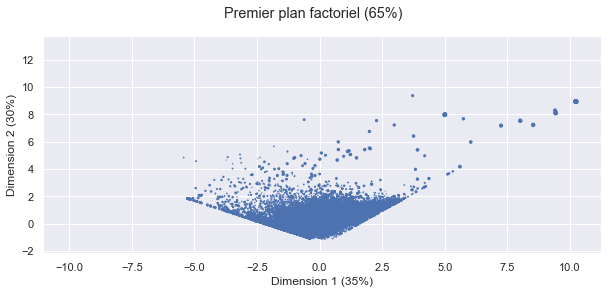

In [145]:
WGI_pca_df.plot.scatter("Dim1", "Dim2", "Dim3") # nuage de points
plt.xlabel("Dimension 1 (35%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (30%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (65%)") # titre général
plt.show()

In [91]:
WGI_num.shape

(66247, 4)

In [92]:
WGI_num

array([[-0.29446725, -0.56352163, -0.68055206,  0.40812004],
       [-0.39443887,  0.10107545,  0.81409556, -0.38518141],
       [-0.16567497, -0.77202268, -0.68055206, -0.51144473],
       ...,
       [ 0.97814452, -0.72315524,  0.83830929, -0.29923747],
       [-1.05731379, -0.69057696, -0.6365271 , -0.44070898],
       [-1.10234606, -0.77202268, -0.68055206, -0.51144473]])

In [93]:
n = WGI_num.shape[0] # nb individus
p = WGI_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': WGI_num0.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,carbohydrates_100g,-0.708883,0.401537
1,proteins_100g,0.595251,0.566145
2,fat_100g,0.537019,0.519563
3,fiber_100g,-0.486409,0.681259


In [94]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(WGI_pca_df["nutrition_grade_fr"].drop_duplicates(), palette(range(6))))
couleurs

{'A': array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 'B': array([0.85098039, 0.37254902, 0.00784314, 1.        ]),
 'E': array([0.45882353, 0.43921569, 0.70196078, 1.        ]),
 'D': array([0.90588235, 0.16078431, 0.54117647, 1.        ]),
 'C': array([0.4       , 0.65098039, 0.11764706, 1.        ]),
 'N.A': array([0.90196078, 0.67058824, 0.00784314, 1.        ])}

In [95]:
position = dict(zip(couleurs.keys(), range(6)))
position

{'A': 0, 'B': 1, 'E': 2, 'D': 3, 'C': 4, 'N.A': 5}

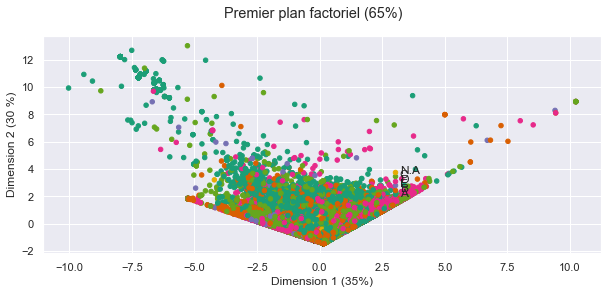

In [146]:
# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in WGI_pca_df["nutrition_grade_fr"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1 (35%)") 
plt.ylabel("Dimension 2 (30 %)")
plt.suptitle("Premier plan factoriel (65%)")
plt.show()

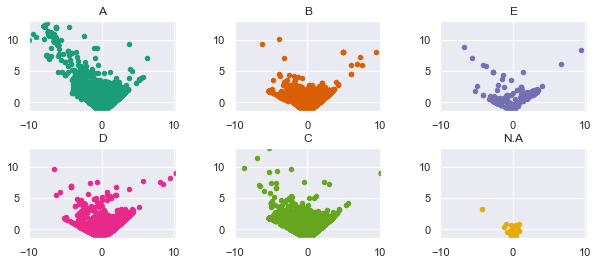

In [97]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for cont, coul in couleurs.items():
    ax = fig.add_subplot(2, 3, position[cont] + 1)
    temp = WGI_pca_df.query('nutrition_grade_fr == "' + cont + '"')
    temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
    ax.set_title(cont)
    ax.set_xlim(WGI_pca_df.Dim1.quantile([0, 1])) # permet d'avoir min et max
    ax.set_ylim(WGI_pca_df.Dim2.quantile([0, 1])) # idem
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()

In [98]:
n = WGI_num.shape[0] # nb individus
p = WGI_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': WGI_num0.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1], 'COR_3': corvar[:,2]})
coordvar

,id,COR_1,COR_2,COR_3
0,carbohydrates_100g,-0.708883,0.401537,0.385111
1,proteins_100g,0.595251,0.566145,-0.397150
2,fat_100g,0.537019,0.519563,0.616237
3,fiber_100g,-0.486409,0.681259,-0.366918


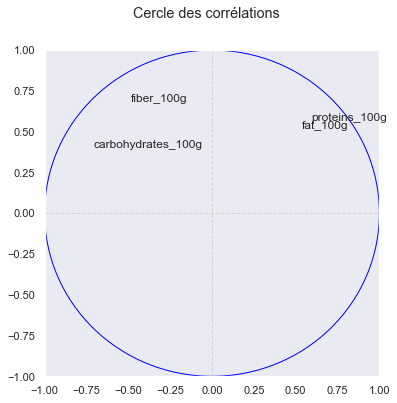

In [99]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
axes.grid(False)
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))


C:\Users\aurel\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """Entry point for launching an IPython kernel.


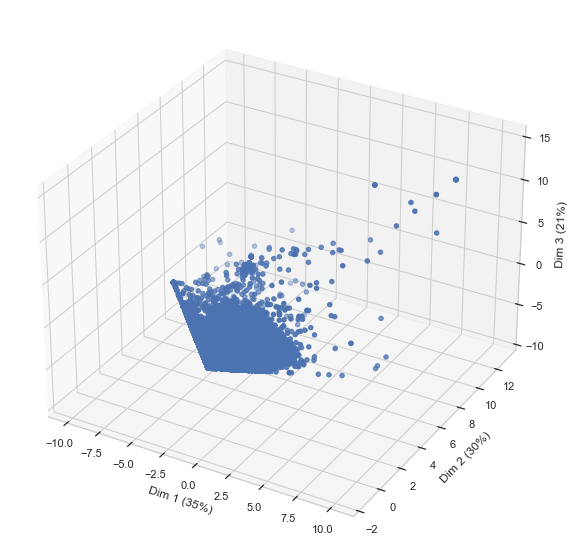

In [211]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=WGI_pca_df["Dim1"], 
    ys=WGI_pca_df["Dim2"], 
    zs=WGI_pca_df["Dim3"],
    cmap='tab10'
)
ax.set_xlabel('Dim 1 (35%)')
ax.set_ylabel('Dim 2 (30%)')
ax.set_zlabel('Dim 3 (21%)')
plt.show()

In [194]:
#test=WGI_num0.sample(5000)
test=WGI_num0.head(5000)

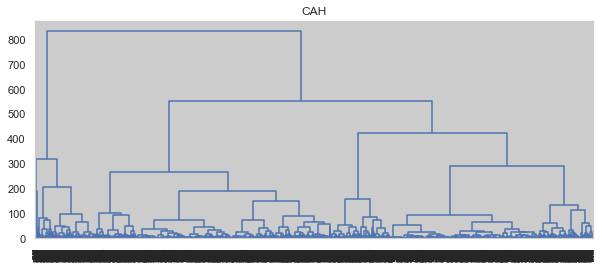

In [195]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(test,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=test.index,color_threshold=0)
plt.show()

4 groupes.

In [196]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 4)
kmeans2.fit(WGI_num0)

KMeans(n_clusters=4)

In [197]:
pd.Series(kmeans2.labels_).value_counts()

0    35424
2    18737
3     8561
1     3525
dtype: int64

In [198]:
kmeans2.cluster_centers_

array([[ 7.15733999,  2.10089117,  2.25166884,  1.20024066],
       [44.40883503,  3.84428458,  1.68355133,  4.32389881],
       [20.07419239,  3.89164503,  3.62473747,  1.82897153],
       [ 2.84496331, 17.8825996 ,  5.97981458,  0.4382165 ]])

In [199]:
WGI_k2 = WGI_num0.assign(classe = kmeans2.labels_)
WGI_k2.groupby("classe").mean()

,carbohydrates_100g,proteins_100g,fat_100g,fiber_100g
classe,,,,
0,7.160072,2.101339,2.250818,1.200509
1,44.419296,3.843809,1.682627,4.323948
2,20.081007,3.891808,3.625420,1.829453
3,2.845095,17.879811,5.982917,0.438114


In [200]:
WGI_k2

,carbohydrates_100g,proteins_100g,fat_100g,fiber_100g,classe
173,8.97,1.28,0.00,2.600,0
185,7.86,5.36,6.79,0.357,0
226,10.40,0.00,0.00,0.000,0
295,22.54,2.82,11.27,0.000,2
331,3.53,1.18,0.00,2.400,0
...,...,...,...,...,...
320668,10.20,0.60,0.50,0.600,0
320683,0.00,25.00,0.50,0.000,3
320693,23.10,0.30,6.90,0.600,2
320763,0.50,0.50,0.20,0.200,0


In [201]:
WGI_pca_k2.loc[WGI_pca_k2.classe==3]

,Dim1,Dim2,Dim3,product,nutrition_grade_fr,classe
173,-0.587555,-0.465092,-0.506452,FRESH ORGANIC CARROTS,A,3
185,0.820339,0.053878,0.497877,QUICHE LORRAINE,B,3
226,-0.390300,-1.093393,0.012236,"PEPSI, NOUVEAU GOÛT !",E,3
331,-0.271072,-0.695580,-0.678971,ROMAINE HEARTS,A,3
332,-0.271072,-0.695580,-0.678971,ROMAINE,A,3
...,...,...,...,...,...,...
320606,-0.072570,-1.285261,-0.211780,AYAM PURE COCONUT WATER,B,3
320628,0.010207,-0.887462,-0.053947,BOISSON AU SOJA (SOY BEAN 8%),B,3
320668,-0.367474,-0.866799,-0.049359,100% PUR JUS 4 AGRUMES,C,3
320763,0.179483,-1.311826,-0.401282,THÉ VERT EARL GREY,C,3


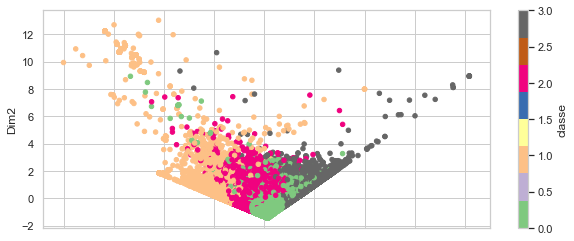

In [202]:
WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans2.labels_)
WGI_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

In [203]:
WGI_pca_k2.shape

(66247, 6)

C:\Users\aurel\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """Entry point for launching an IPython kernel.


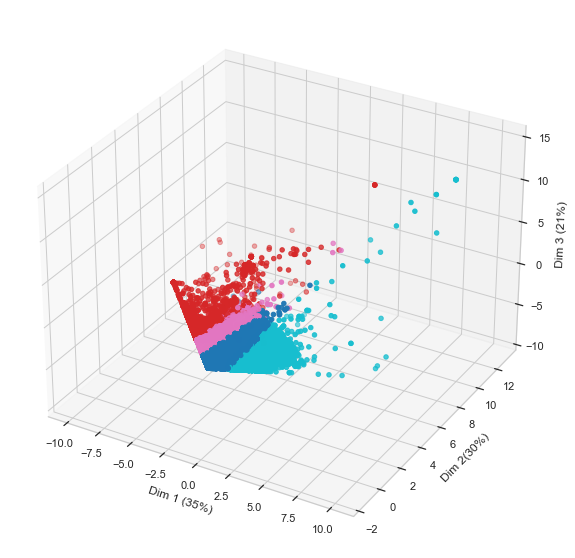

In [204]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans2.labels_)
ax.scatter(
    xs=WGI_pca_k2["Dim1"], 
    ys=WGI_pca_k2["Dim2"], 
    zs=WGI_pca_k2["Dim3"],
    c=WGI_pca_k2["classe"],
    cmap='tab10'
)
ax.set_xlabel('Dim 1 (35%)')
ax.set_ylabel('Dim 2(30%)')
ax.set_zlabel('Dim 3 (21%)')
plt.show()

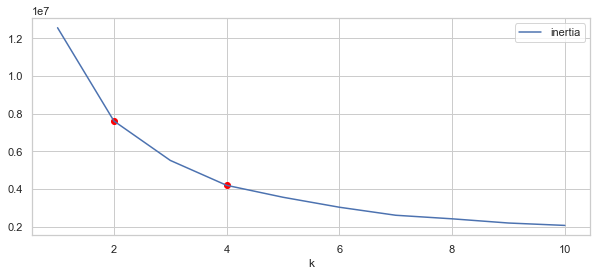

In [205]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(WGI_num0)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(4, inertia.query('k == 4')["inertia"], c = "red")
plt.show()

coude plus marqué au niveau du 4

In [206]:
WGI_pca_k2

,Dim1,Dim2,Dim3,product,nutrition_grade_fr,classe
173,-0.587555,-0.465092,-0.506452,FRESH ORGANIC CARROTS,A,0
185,0.820339,0.053878,0.497877,QUICHE LORRAINE,B,0
226,-0.390300,-1.093393,0.012236,"PEPSI, NOUVEAU GOÛT !",E,0
295,0.316278,0.709583,1.963515,"ICE CREAM, VANILLA",D,2
331,-0.271072,-0.695580,-0.678971,ROMAINE HEARTS,A,0
...,...,...,...,...,...,...
320668,-0.367474,-0.866799,-0.049359,100% PUR JUS 4 AGRUMES,C,0
320683,2.286947,0.708266,-2.096699,TUNA CHUNKS IN SPRING WATER,A,3
320693,-0.449261,0.195030,1.424524,SANTA CRUZ CHILLI & LIME DRESSING,C,2
320763,0.179483,-1.311826,-0.401282,THÉ VERT EARL GREY,C,0


Ces 4 classes vont permettre de manger équilibrer en les combinant.

In [207]:
from sklearn.cluster import KMeans

kmeans_base = KMeans(n_clusters = 4)
kmeans_base.fit(WGI_num0)

KMeans(n_clusters=4)

In [208]:
WGI_k2_base = dataacp.assign(classe = kmeans_base.labels_)
WGI_k2_base.groupby("classe").median()

,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,fruits_vegetables_nuts_100g,sugars_100g,salt_100g,additives_n,nutrition_score_fr_100g
classe,,,,,,,,,,,
0,523.0,1.77,17.86,4.42,1.10,0.0,0.0,0.20,1.14300,1.0,2.0
1,749.0,40.00,1.12,0.00,0.00,1.1,50.0,25.00,0.45466,1.0,7.0
2,205.0,7.00,1.33,0.40,0.00,0.8,38.0,3.33,0.26162,1.0,1.0
3,502.0,19.00,3.40,2.34,0.44,1.2,12.0,9.76,0.39624,1.0,2.0


In [209]:
WGI_k2_base

,code,product_name,categories,ingredients_text,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,fruits_vegetables_nuts_100g,sugars_100g,salt_100g,additives_n,nutrition_grade_fr,main_category,nutrition_score_fr_100g,product_name_long,ingredients_from_palm_oil,classe
173,0000000069601,FRESH ORGANIC CARROTS,AUTRES,FRESH ORGANIC CARROTS,159.0,8.97,1.28,0.00,0.00,2.600,NaN,6.410,0.19558,0.0,A,AUTRES,-2.0,FRESH ORGANIC CARROTS,NON,2
185,0000008237798,QUICHE LORRAINE,QUICHES LORRAINES,"INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES. JAMBON (PORC. BOUILLON DE LEGUMES. SEL. SUCRE, DEXTROSE. NITRITE DE SODIUM. LACTATE DE SODIUM, ERYTHORBATE DE SODIUM. DIÂCETATE DE SODIUMI, OEUF LIQUIDE ENTIER. FROMAGES CHEDUAR ET SUISSE [SUBSTANCES LAITIERES MODIFIEES. SEL. CULTURE BACTERIENNE. ENZYME MICROBIEN. CHLORURE DE CALCIUM. NATAMYCINE. CELLULOSE]. OIGNON. AMIDON DE MAIS MODIFIE. EPICES. SEL. CITRATE DE SODIUM. PHOSPHATE DE SODIUM, CARRAGHENINE. GOMME DE CAROUBE), CROUTE (FARINE. SHORTENING D'HUILE DE PALME ET DE CANOLA. EAU. DEXTROSE. SEL. LEVURE. HUILE VEGETALE. L-CYSTEINE. PROPIONATE DE SODIUM), FROMAGES CHEDDAR ET MONTEREY (SUBSTANCES LAITIERES MODIFIEES. CULTURE BACTERIENNE. SEL. ENZYME MICROBIEN. CHLORURE DE CALCIUM. CELLULOSE. COLORANT. NATAMYCINE). PERSIL SECHE. CONTIENT 2 OEUF. BLE. LAIT. PEUT CONTENIRZ POISSON. MOLLUSQUES. CRUSTACES. NOIX VARIEES. SESAME. MOUTARDE. SOYA. SULFITES.",478.0,7.86,5.36,6.79,2.86,0.357,NaN,0.714,0.49900,3.0,B,EN:MEALS,2.0,QUICHE LORRAINE - QUICHE LORRAINE,OUI,2
226,0000040608754,"PEPSI, NOUVEAU GOÛT !",SODAS AU COLA,"EAU GAZÉIFIÉE, SUCRE, COLORANT CARAMEL E150D, ACIDIFIANT : ACIDE PHOSPHORIQUE, ARÔMES (DONT : EXTRAITS NATURELS DE VÉGÉTAUX, CAFÉINE)",177.0,10.40,0.00,0.00,0.00,0.000,NaN,10.400,0.02540,2.0,E,EN:SODAS,13.0,"PEPSI, NOUVEAU GOÛT ! - BOISSON GAZEUSE RAFRAÎCHISSANTE AUX EXTRAITS NATURELS DE VÉGÉTAUX",NON,2
295,0000450193000,"ICE CREAM, VANILLA",AUTRES,"MILK, CREAM, SUGAR, CORN SYRUP, GUAR GUM, LOCUST BEAN GUM, NATURAL VANILLA FLAVOR, VANILLA BEANS, LACTASE ENZYME*.",883.0,22.54,2.82,11.27,7.04,0.000,NaN,16.900,0.14224,2.0,D,AUTRES,12.0,"ICE CREAM, VANILLA",NON,3
331,0000651003214,ROMAINE HEARTS,AUTRES,ROMAINE HEARTS.,75.0,3.53,1.18,0.00,0.00,2.400,NaN,1.180,0.01524,0.0,A,AUTRES,-3.0,ROMAINE HEARTS,NON,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320668,9577283844672,100% PUR JUS 4 AGRUMES,"ALIMENTS ET BOISSONS À BASE DE VÉGÉTAUX,BOISSONS,BOISSONS À BASE DE VÉGÉTAUX,BOISSONS AUX FRUITS,JUS ET NECTARS,JUS ET NECTARS DE FRUITS,JUS DE FRUITS,JUS MULTIFRUITS","JUS D'ORANGE (DONT PULPE 1,6%), JUS DE CLÉMENTINE, JUS DE PAMPLEMOUSSE, JUS D'ORANGE SANGUINE.",192.0,10.20,0.60,0.50,0.00,0.600,100.0,9.200,0.03000,0.0,C,EN:FRUIT-JUICES,4.0,100% PUR JUS 4 AGRUMES - JUS 4 AGRUMES,NON,2
320683,96069868,TUNA CHUNKS IN SPRING WATER,TUNA CHUNKS,"TUNA, SPRING WATER",444.0,0.00,25.00,0.50,0.00,0.000,NaN,0.000,0.76200,0.0,A,EN:TUNAS,-1.0,TUNA CHUNKS IN SPRING WATER - TUNA CHUNKS IN SPRING WATER,NON,0
320693,96092521,SANTA CRUZ CHILLI & LIME DRESSING,"GROCERIES,DRESSING,SAUCES","WATER, SUGAR, RICE WINE VINEGAR (CONTAINS SULPHITES), RAPESEED OIL, CONCENTRATED LIME JUICE 5% (CONTAINS SULPHITES), WHITE WINE VINEGAR (CONTAINS SULPHITES), GINGER PURÉE, CORNFLOUR, RED CHILLI PURÉE 2%, GARIIC PURÉE, CORIANDER, SALT, CRUSHED DRIED CHILLIES 0.2%, CHILLI POWDER BLEND 1.2% (CHILLI POWDER, CUMIN, SAIT, GARLIC POWDER, OREGANO), COARSE GROUND BLACK PEPPER, STABILISER (XANTHAN GUM).",660.0,23.10,0.30,6.90,0.50,0.600,NaN,16.700,0.54102,1.0,C,EN:GROCERIES,6.0,SANTA CRUZ CHILLI & LIME DRESSING,NON,3
320763,99111250,THÉ VERT EARL GREY,THÉS VERTS,"THÉ VERT, ARÔME NATUREL BERGAMOTE AVEC AUTRES ARÔMES NATURELS, ÉCORCES D'ORANGE DOUCE 3%",21.0,0.50,0.50,0.20,0.20,0.200,NaN,0.500,0.02540,0.0,C,EN:GREEN-TEAS,2.0,THÉ VERT EARL GREY - THÉ BIO ÉQUITABLE,NON,2


In [210]:
WGI_k2_base[["product_name", "carbohydrates_100g", "proteins_100g", "fat_100g", "fiber_100g"]].loc[WGI_k2_base.classe==0]

,product_name,carbohydrates_100g,proteins_100g,fat_100g,fiber_100g
413,RAW SHRIMP,0.00,14.12,0.00,0.0
526,HONEY ROAST HAM,4.30,24.50,2.00,0.1
569,BRITISH BEEF BRAISING STEAK,0.00,22.10,6.40,0.0
578,WILD ALASKAN PINK SALMON,0.00,19.05,7.94,0.0
584,PREMIUM CHUNK WHITE CHICKEN IN BROTH,0.00,19.67,5.74,0.0
...,...,...,...,...,...
320580,SARDINES IN TERIYAKI SAUCE,8.93,17.86,8.93,0.0
320582,SARDINES IN KUNG PAO SAUCE,8.93,19.64,10.71,0.0
320584,MACKEREL IN TOMATO SAUCE,1.79,12.50,14.29,1.8
320612,"SARDINES IN SPICY TOMATO SAUCE, CHILI AND LIME",1.79,17.86,7.14,0.0


Vérifions que les nouveaux groupes sont adaptés et significativement différents.

moyenne energy_100g = 393.02024001086835
moyenne carbohydrates_100g = 12.239514150074722
moyenne proteins_100g = 4.739491978504688
moyenne fat_100g = 3.0916641840385224
moyenne saturated_fat_100g = 1.0515509073618428
moyenne fiber_100g = 1.4460713768170632
moyenne fruits_vegetables_nuts_100g = 36.36691542288557
moyenne sugars_100g = 6.44622626081181
moyenne salt_100g = 0.8942181885342129
moyenne additives_n = 1.6639244041239603
moyenne nutrition_score_fr_100g = 2.278167735689217


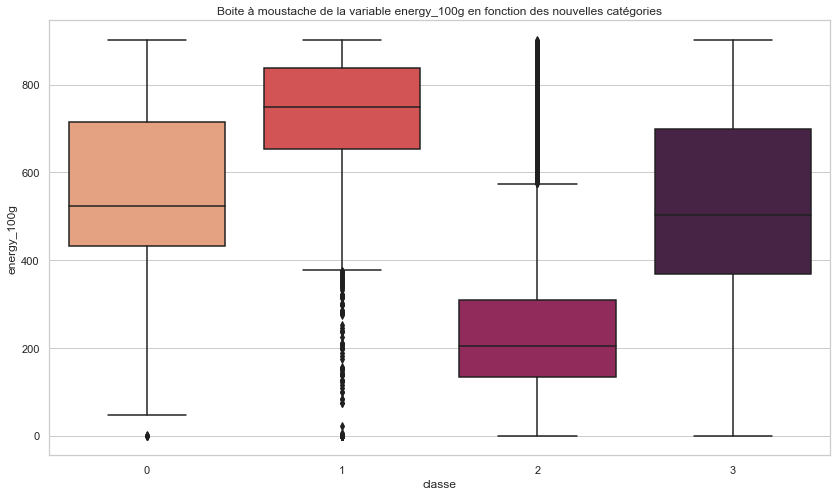

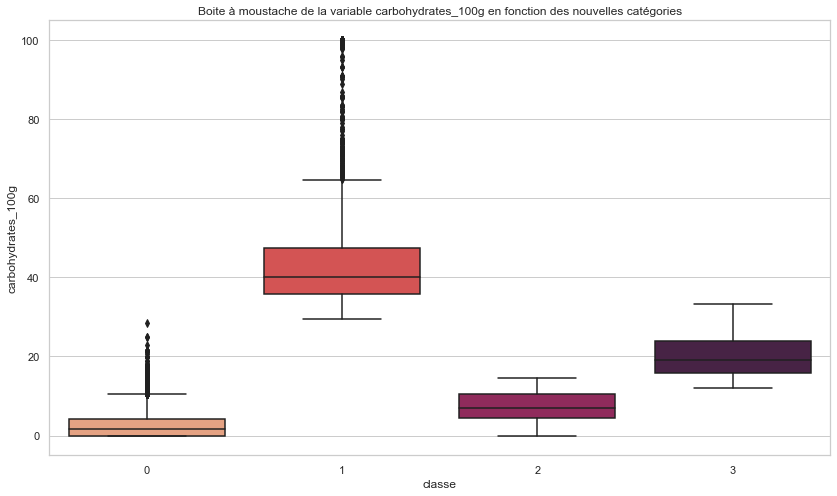

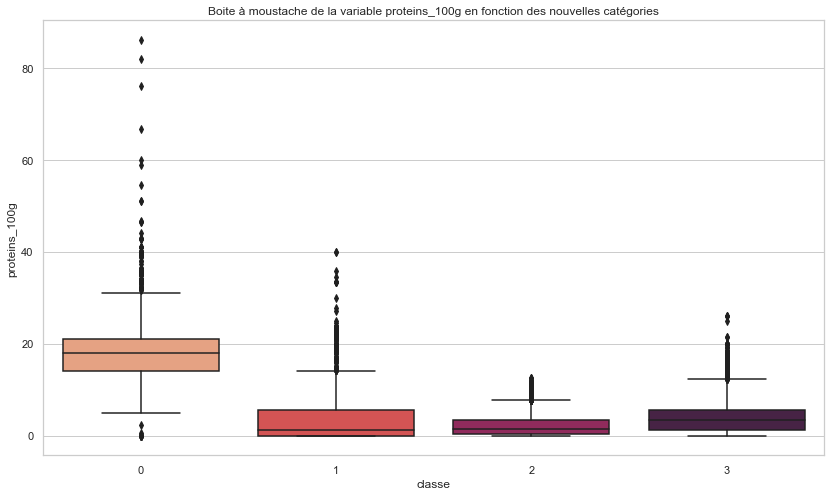

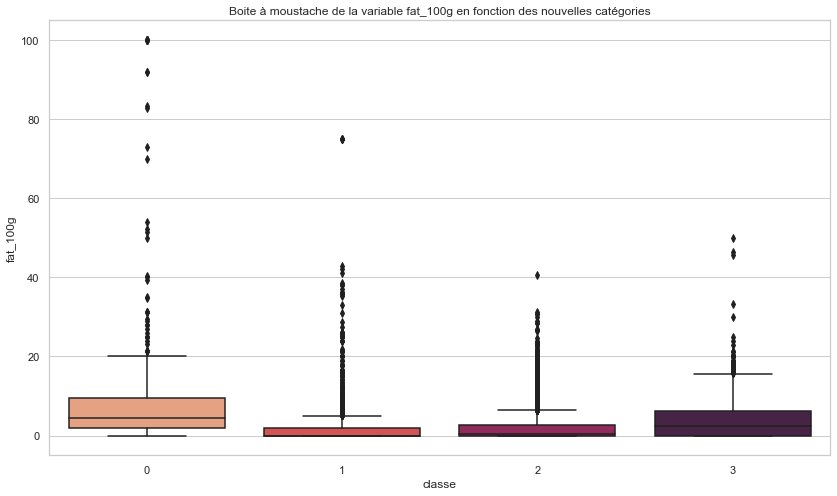

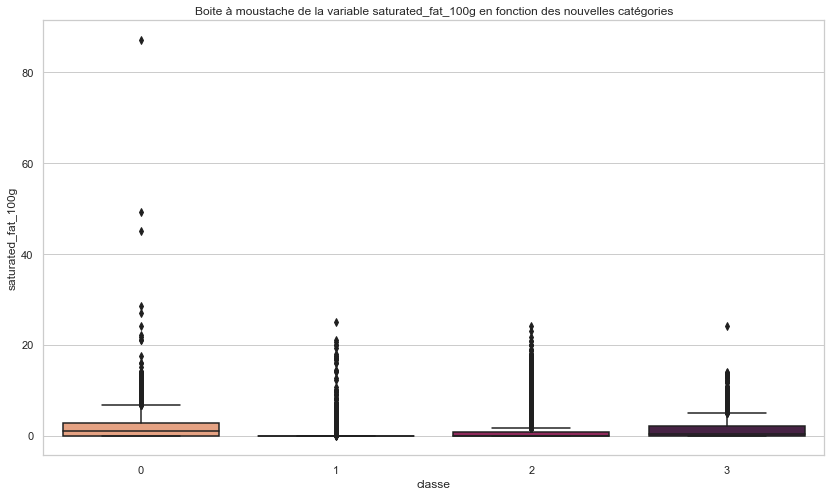

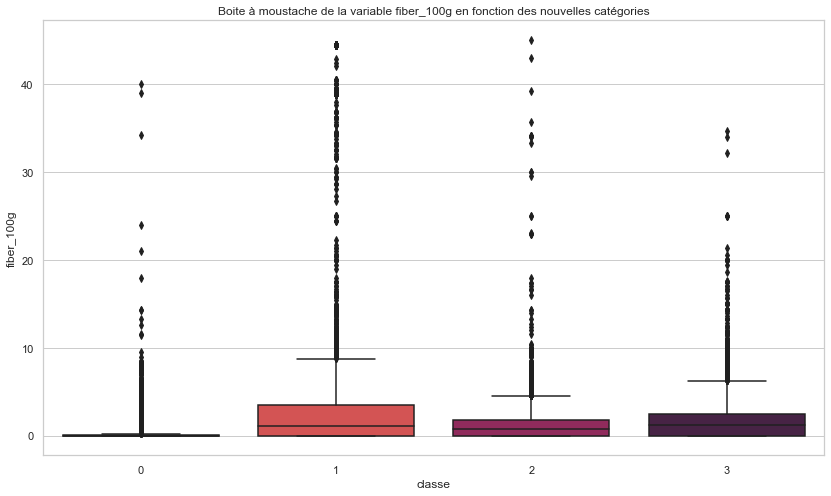

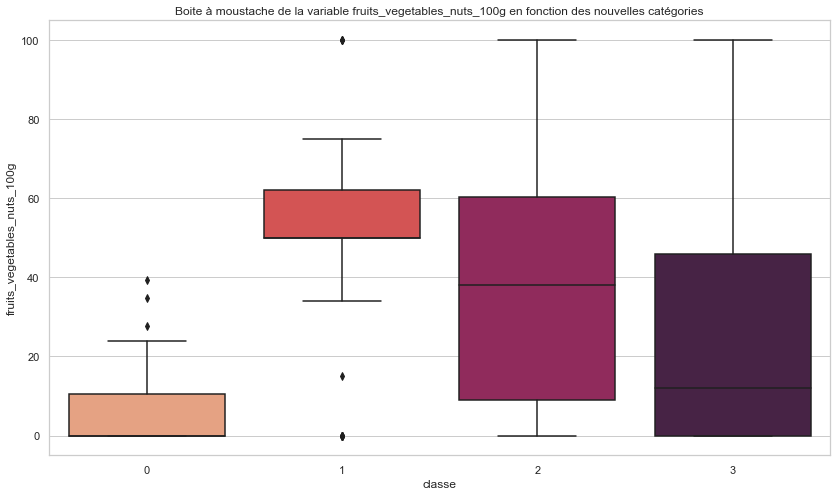

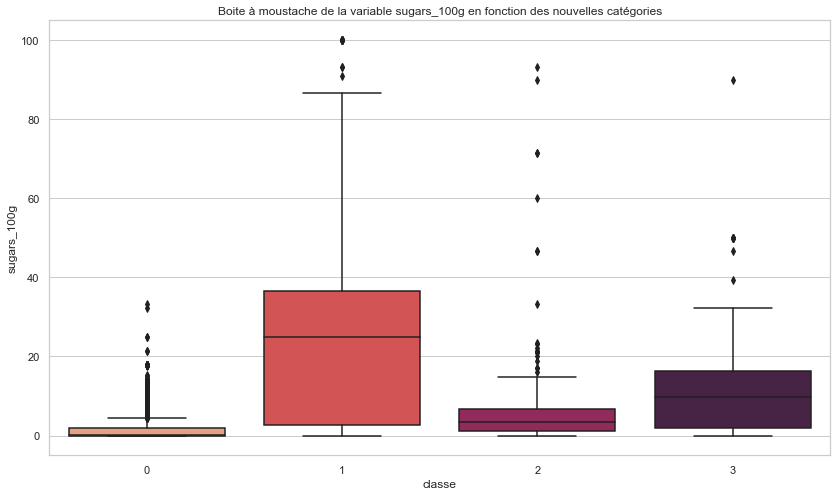

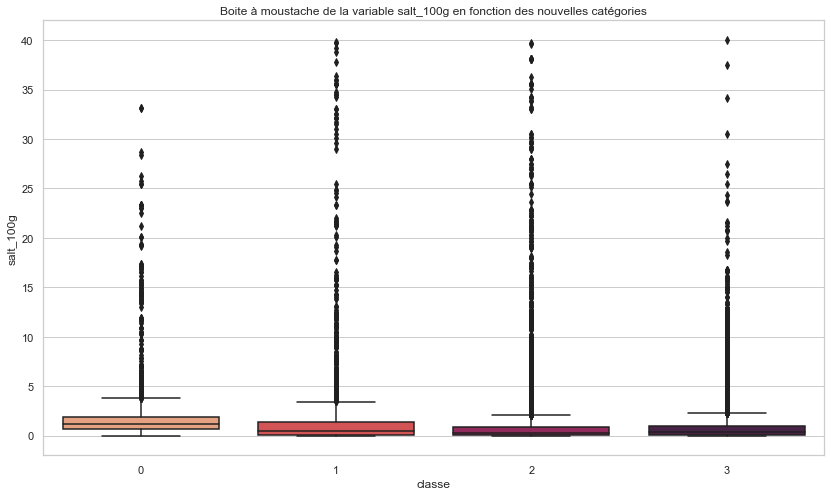

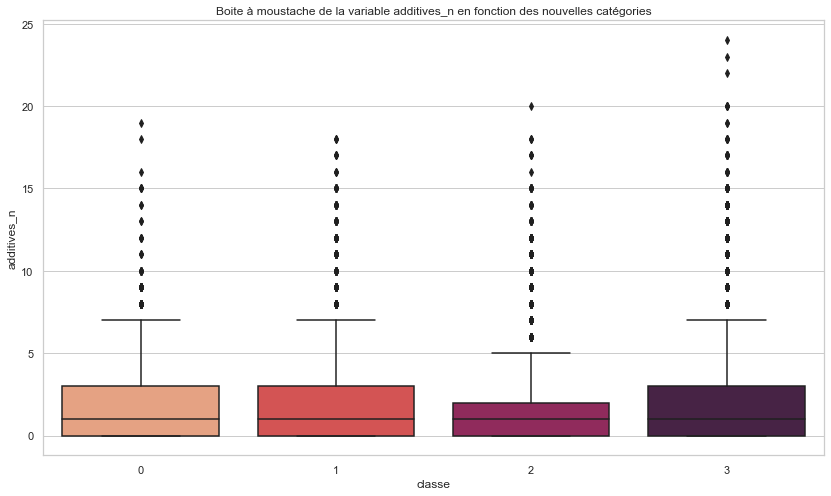

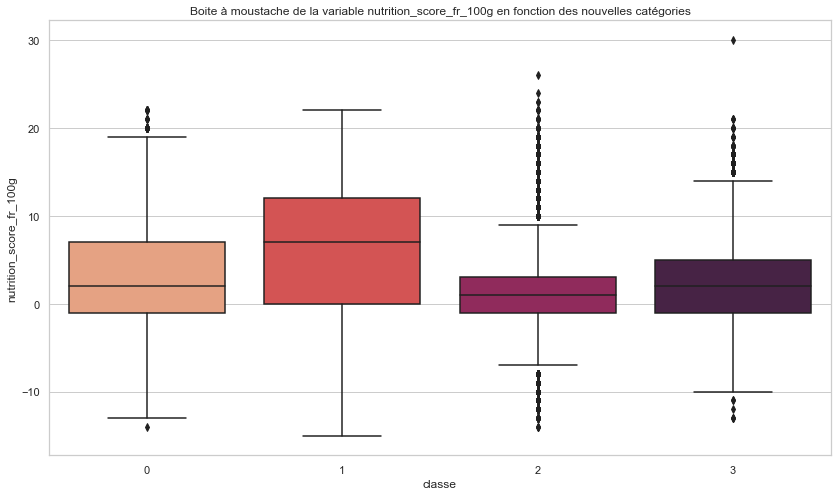

In [212]:
for col in WGI_k2_base.select_dtypes(include=['float64']).columns:
    print("moyenne "+col +" = "+str(WGI_k2_base[col].mean()))
    pk.graph_boxplot_by_group(WGI_k2_base, col,"classe", "Boite à moustache de la variable "+col+" en fonction des nouvelles catégories", "rocket_r", (14,8))

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='energy_100g'>

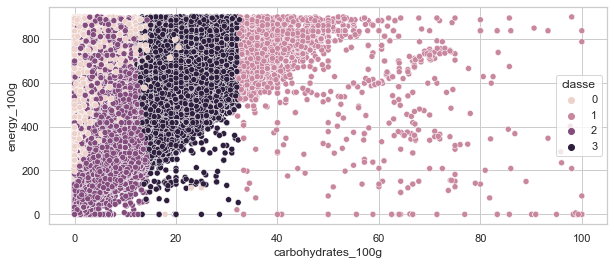

In [213]:
sns.scatterplot(data=WGI_k2_base, x="carbohydrates_100g", y="energy_100g", hue="classe")

<AxesSubplot:xlabel='proteins_100g', ylabel='energy_100g'>

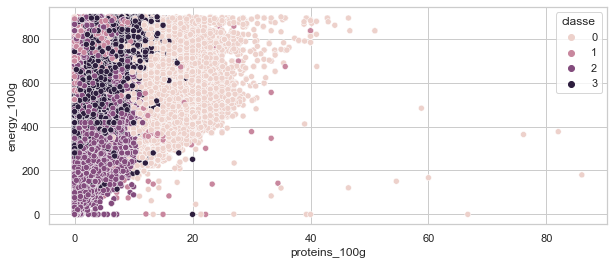

In [214]:
sns.scatterplot(data=WGI_k2_base, x="proteins_100g", y="energy_100g", hue="classe")

<AxesSubplot:xlabel='fat_100g', ylabel='energy_100g'>

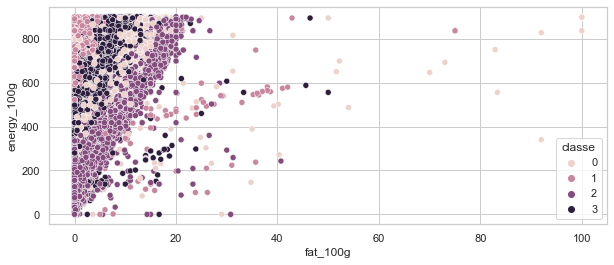

In [215]:
sns.scatterplot(data=WGI_k2_base, x="fat_100g", y="energy_100g", hue="classe")

<AxesSubplot:xlabel='fiber_100g', ylabel='energy_100g'>

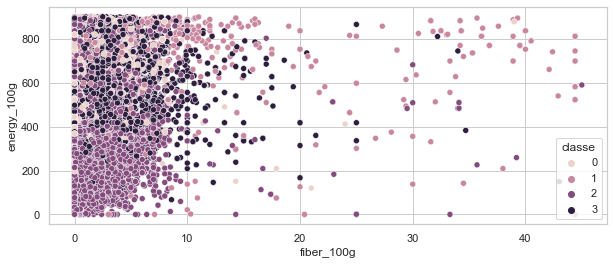

In [216]:
sns.scatterplot(data=WGI_k2_base, x="fiber_100g", y="energy_100g", hue="classe")

# Combinaison des aliments

Glucides = 250g (carbohydrates)

lipides = 50 insaturé et 20 sature

Protéines = 45 g pour une personne de 55 kg 60 g pour une personne de 75 kg

Fibres = 25 à 30 g dont une moitié issue des céréales et l'autre issue des fruits et légumes